<a href="https://colab.research.google.com/github/Kishorecsmani/ScalerProject/blob/main/LoanLogisticRegressionCaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<font color='33A2FF'><b> Problem Statement<b>**

<font color='33A2FF'>1) To determine credit line should be extended to Individuals

<font color='33A2FF'>2) To analyse when bank will loose the opportunity of good customers

<font color='33A2FF'>3) To analyse when bank will give bad loans 

<font color='33A2FF'>4) To analyse which features has high impact onthe target variable

<font color='33A2FF'>5) To analyse what percentage of customers has fully paid the loan.

<font color='33A2FF'>6) To find the real defaulters

<font color='33A2FF'>7) To analyse how bank utilizes non performing asset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
!gdown 1Zg_tLsKknPLi8OC7L-_RGILVidqkknfb

Downloading...
From: https://drive.google.com/uc?id=1Zg_tLsKknPLi8OC7L-_RGILVidqkknfb
To: /content/logistic_regression.csv
100% 100M/100M [00:00<00:00, 288MB/s] 


In [ ]:
df = pd.read_csv('logistic_regression.csv')
df.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


<font color='33A2FF'><b>Identification of variables and data types:</b></font>

In [ ]:
df.shape

(396030, 27)

In [ ]:
# Number of records with No Null value
df.info(verbose=True, null_counts=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

<font color='33A2FF'><b>Analysing the basic metrics :</b></font>

In [ ]:
#checking null values in every column of our data
df.isnull().sum()/len(df)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

Number of columns with null values:6


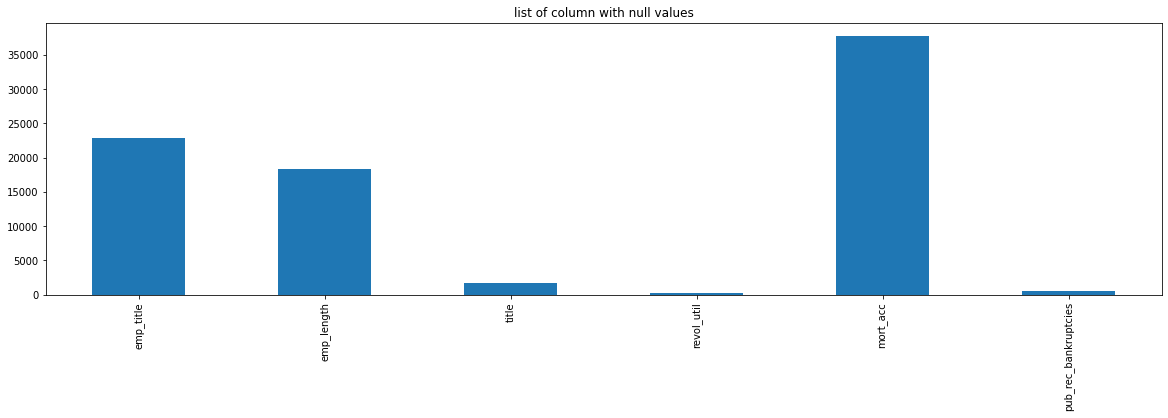

In [ ]:
#columns with NA more than 30%
NA_col = df.isnull().sum()
NA_col=NA_col[NA_col.values > (0.0*len(df))]
print('Number of columns with null values:' + str(NA_col.count()) )
plt.figure(figsize=(20,5))
NA_col.plot(kind='bar')
plt.title('list of column with null values')
plt.show()

<font color='#0dab7f'>columns having null values</font>

pub_rec_bankruptcies ;

mort_acc ;

revol_util ;

title ;

emp_length ;

emp_title ;


In [ ]:
# describe on column having integer data type
df.describe(include=[np.number])

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [ ]:
# describe on column having integer data type
df.describe(include = object)

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
count,396030,396030,396030,373103,377729,396030,396030,396030,396030,396030,394275,396030,396030,396030,396030
unique,2,7,35,173105,11,6,3,115,2,14,48817,684,2,3,393700
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,Oct-2000,f,INDIVIDUAL,USCGC Smith\r\nFPO AE 70466
freq,302005,116018,26655,4389,126041,198348,139563,14846,318357,234507,152472,3017,238066,395319,8


<font color='#0dab7f'>Missing/null values treatment</font>

In [ ]:
# Filling missing value of column title, emp_length, emp_title with most repeated value

df['title'] = df['title'].replace(np.nan , df['title'].value_counts().index[0])
df['emp_length'] = df['emp_length'].replace(np.nan , df['emp_length'].value_counts().index[0])
df['emp_title'] = df['emp_title'].replace(np.nan , df['emp_title'].value_counts().index[0])

In [ ]:
# Filling missing value of pub_rec_bankruptcies, mort_acc, revol_util column with median value

df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].replace(np.nan , df['pub_rec_bankruptcies'].median())
df['mort_acc'] = df['mort_acc'].replace(np.nan , df['mort_acc'].median())
df['revol_util'] = df['revol_util'].replace(np.nan , df['revol_util'].median())

In [ ]:
#checking null values again after imputting the nan values
df.isnull().sum()/len(df)*100

loan_amnt               0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
emp_title               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
title                   0.0
dti                     0.0
earliest_cr_line        0.0
open_acc                0.0
pub_rec                 0.0
revol_bal               0.0
revol_util              0.0
total_acc               0.0
initial_list_status     0.0
application_type        0.0
mort_acc                0.0
pub_rec_bankruptcies    0.0
address                 0.0
dtype: float64

<font color='#0dab7f'>After missing value treatment, No missing/null values in all the columns </font>

<font color='#0dab7f'>Duplicate check</font>

In [ ]:
df.loc[df.duplicated() == True]  

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address


<font color='#0dab7f'>No rows are duplicated</font>

In [ ]:
num_col = df.describe(include=[np.number]).columns
cat_col = df.describe(include=object).columns

In [ ]:
print("List of numerical columns : ", num_col)
print("List of categorical columns : ", cat_col)

List of numerical columns :  Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')
List of categorical columns :  Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')


In [ ]:
#number of unique values in our data
remove = []
for i in num_col:
  if df[i].nunique() < 10:
    print(i)

print("List of numerical columns : ", num_col)
print("List of categorical columns : ", cat_col)

pub_rec_bankruptcies
List of numerical columns :  Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')
List of categorical columns :  Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')


**<font color='33A2FF'><b> Feature engineering<b>**

In [ ]:
# removing the word months from term
df['term'] = df['term'].str.split(n = 2).str[0]

In [ ]:
# create new column to capture the flag for pub_rec, mort_acc, pub_rec_bankruptcies column when greater 1 

def setflag(X):
  if X > 1:
    X = 1
  else:
    X = 0
  return X

In [ ]:
df['pub_rec_flag'] = df['pub_rec'].transform(setflag)
df['mort_acc_flag'] = df['mort_acc'].transform(setflag)
df['pub_rec_bankruptcies_flag'] = df['pub_rec_bankruptcies'].transform(setflag)

In [ ]:
df['address'] = df['address'].str.split(',').str[1].str.split(' ').str[1]

In [ ]:
df.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,pub_rec_flag,mort_acc_flag,pub_rec_bankruptcies_flag
0,10000.0,36,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,41.8,25.0,w,INDIVIDUAL,0.0,0.0,OK,0,0,0
1,8000.0,36,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,53.3,27.0,f,INDIVIDUAL,3.0,0.0,SD,0,1,0
2,15600.0,36,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,92.2,26.0,f,INDIVIDUAL,0.0,0.0,WV,0,0,0
3,7200.0,36,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,21.5,13.0,f,INDIVIDUAL,0.0,0.0,MA,0,0,0
4,24375.0,60,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,69.8,43.0,f,INDIVIDUAL,1.0,0.0,VA,0,0,0


In [ ]:
df['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year'],
      dtype=object)

In [ ]:
emp_length_order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years',  '10+ years']
df['emp_length'] = pd.Categorical(df['emp_length'] , categories = emp_length_order, ordered = True)
print(df['emp_length'].unique())  

['10+ years', '4 years', '< 1 year', '6 years', '9 years', ..., '3 years', '8 years', '7 years', '5 years', '1 year']
Length: 11
Categories (11, object): ['< 1 year' < '1 year' < '2 years' < '3 years' ... '7 years' < '8 years' <
                          '9 years' < '10+ years']


In [ ]:
df['issue_month'], df['issue_year'] = df['issue_d'].str.split('-', 1).str
df[['issue_d', 'issue_month' , 'issue_year']].head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.


,issue_d,issue_month,issue_year
0,Jan-2015,Jan,2015
1,Jan-2015,Jan,2015
2,Jan-2015,Jan,2015
3,Nov-2014,Nov,2014
4,Apr-2013,Apr,2013


In [ ]:
# Set the order - months from Jan to Dec
months_order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['issue_month']=pd.Categorical(categories=months_order, ordered=True, values=df['issue_month'])
df['issue_month'].unique()

['Jan', 'Nov', 'Apr', 'Sep', 'Oct', ..., 'Dec', 'Jul', 'Feb', 'Mar', 'Aug']
Length: 12
Categories (12, object): ['Jan' < 'Feb' < 'Mar' < 'Apr' ... 'Sep' < 'Oct' < 'Nov' < 'Dec']

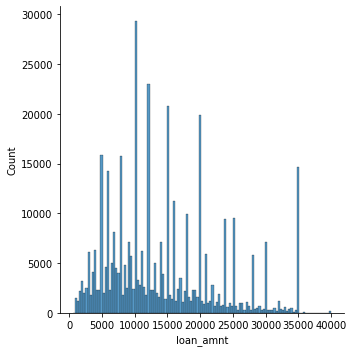

In [ ]:
# To decide on Bin Range in next step
sns.displot(df['loan_amnt'])
plt.show()

In [ ]:
#  Create Bins (Categorical Vriable) for range of Loan Amount
bins = [0, 5000, 10000, 15000, 20000, 25000, 40000]
slot = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000', '25000 and above']
df['loan_amnt_range'] = pd.cut(df['loan_amnt'], bins, labels = slot)
df['loan_amnt_range'].head(10)

0         5000-10000
1         5000-10000
2        15000-20000
3         5000-10000
4        20000-25000
5        15000-20000
6        15000-20000
7        10000-15000
8        15000-20000
9    25000 and above
Name: loan_amnt_range, dtype: category
Categories (6, object): ['0-5000' < '5000-10000' < '10000-15000' < '15000-20000' < '20000-25000' <
                         '25000 and above']

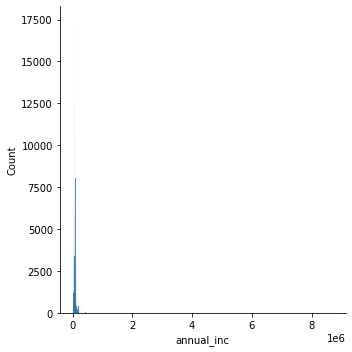

In [ ]:
# To decide on Bin Range in next step     
sns.displot(df['annual_inc'])
plt.show()

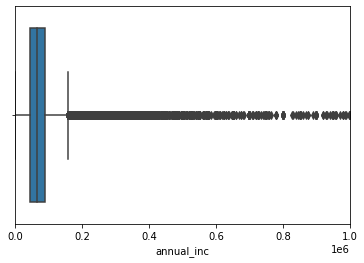

In [ ]:
# To decide on Bin Range in next step
sns.boxplot(data=df, x='annual_inc')
plt.xlim(-100, 1000000)
plt.show()

In [ ]:
# Create Bins (Categorical Vriable) for range of Annual Income
bins = [0, 25000, 50000, 75000, 100000, 1000000]
slot = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000 and above']
df['annual_inc_range'] = pd.cut(df['annual_inc'], bins, labels = slot)
df[['annual_inc', 'annual_inc_range']].head(5)

,annual_inc,annual_inc_range
0,117000.0,100000 and above
1,65000.0,50000-75000
2,43057.0,25000-50000
3,54000.0,50000-75000
4,55000.0,50000-75000


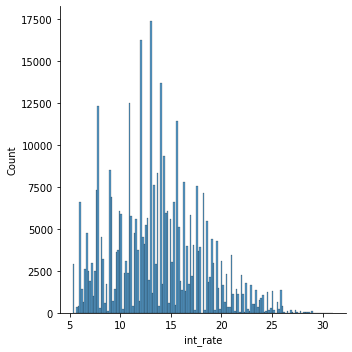

In [ ]:
# To decide on Bin Range in next step
sns.displot(df['int_rate'])
plt.show()

In [ ]:
# Type Driven - Create Bins (Categorical Vriable) for range of Interest rate
bins=[0,7.5,10, 12.5, 15, 20 ]
slot=['0-7.5', '7,5-10', '10-12.5', '12.5-15', '15 and above']
df['int_rate_range']=pd.cut(df['int_rate'], bins, labels=slot)
df[['int_rate', 'int_rate_range']].head(5)

,int_rate,int_rate_range
0,11.44,10-12.5
1,11.99,10-12.5
2,10.49,10-12.5
3,6.49,0-7.5
4,17.27,15 and above


**<font color='33A2FF'><b> UNIVARIATE ANALYSIS<b>**

In [ ]:
#Function for Univariate plot for numerical
def univariateNumerical(df, col):
  print("Describe Method")
  print(df[col].describe())
  print('\n\n')
  print("Value count Method")
  print(df[col].value_counts().head(10))
  plt.figure(figsize=(25,5))
  plt.subplot(1,2,1)
  plt.title("HIST PLOT")
  sns.histplot(data = df, x= col, kde=True, color = 'orange' )
  #plt.subplot(1,3,2)
  #plt.title("COUNT PLOT")
  #sns.countplot(data = df, x= col)
  plt.subplot(1,2,2)
  plt.title("BOX PLOT")
  sns.boxplot(x = col, data = df, color = 'green')
  plt.show()

In [ ]:
#Function for Univariate plot for Discrete
def univariateDiscrete(df, col):
  print("Describe Method")
  print(df[col].describe())
  print('\n\n')
  print("Value count Method")
  print(df[col].value_counts().head(10))
  plt.figure()  
  plt.title("COUNT PLOT")
  sns.countplot(data = df, x= col)
  plt.xticks(rotation = 90)
  plt.show()

<font color='33A2FF'><b> Outlier Detection

In [ ]:
# Function to calculate outlier range
def outlier(df, col): 
  r = 1.5 * stats.iqr(df[col])
  lb = max(np.percentile(df[col], 25) - r, 0)
  ub = np.percentile(df[col], 75) + r
  print(" ")
  print('\033[1m'+'\033[95m' +'OUTLIER FOR COLUMN : '+ col )
  print("Outliers:",sum(df[col] > ub) + sum(df[col] < lb))
  print("Lower limit", lb)
  print("Upper limit", ub ,'\033[0m')

In [ ]:
def outlierRemoval(df, col): 
  r = 1.5 * stats.iqr(df[col])
  lb = max(np.percentile(df[col], 25) - r, 0)
  ub = np.percentile(df[col], 75) + r
  df = df[(df[col]>=lb) & (df[col]<=ub)]
  return df

In [ ]:
# List of numerical columns :  Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
#       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
#       'pub_rec_bankruptcies'],
#      dtype='object')
#List of categorical columns :  Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
#       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
#       'purpose', 'title', 'earliest_cr_line', 'initial_list_status',
#       'application_type', 'address'],
#      dtype='object')

=======loan_amnt===========
Describe Method
count    396030.000000
mean      14113.888089
std        8357.441341
min         500.000000
25%        8000.000000
50%       12000.000000
75%       20000.000000
max       40000.000000
Name: loan_amnt, dtype: float64



Value count Method
10000.0    27668
12000.0    21366
15000.0    19903
20000.0    18969
35000.0    14576
8000.0     13539
6000.0     12734
5000.0     12443
16000.0    10129
18000.0     9195
Name: loan_amnt, dtype: int64


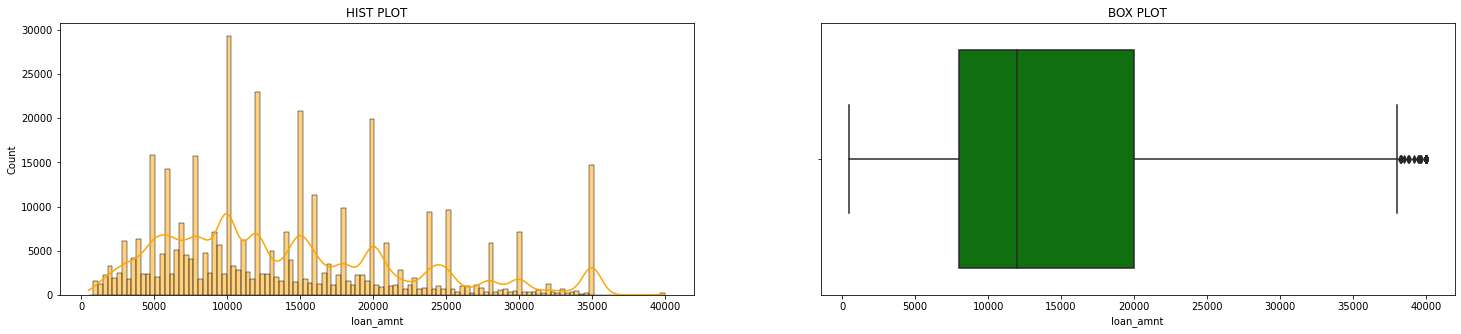

=======int_rate===========
Describe Method
count    396030.000000
mean         13.639400
std           4.472157
min           5.320000
25%          10.490000
50%          13.330000
75%          16.490000
max          30.990000
Name: int_rate, dtype: float64



Value count Method
10.99    12411
12.99     9632
15.61     9350
11.99     8582
8.90      8019
12.12     7358
7.90      7332
16.29     6632
13.11     6580
6.03      6291
Name: int_rate, dtype: int64


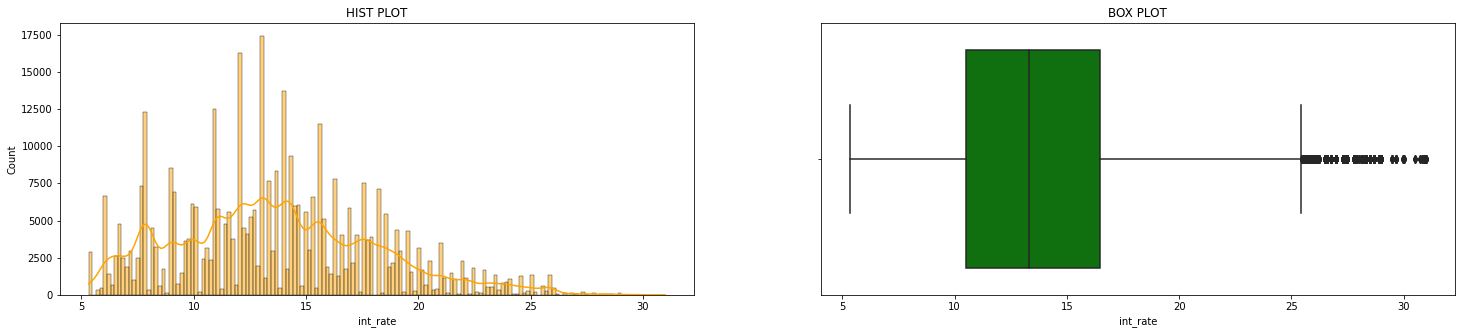

=======installment===========
Describe Method
count    396030.000000
mean        431.849698
std         250.727790
min          16.080000
25%         250.330000
50%         375.430000
75%         567.300000
max        1533.810000
Name: installment, dtype: float64



Value count Method
327.34    968
332.10    791
491.01    736
336.90    686
392.81    683
332.72    641
337.47    624
317.54    574
654.68    556
261.88    527
Name: installment, dtype: int64


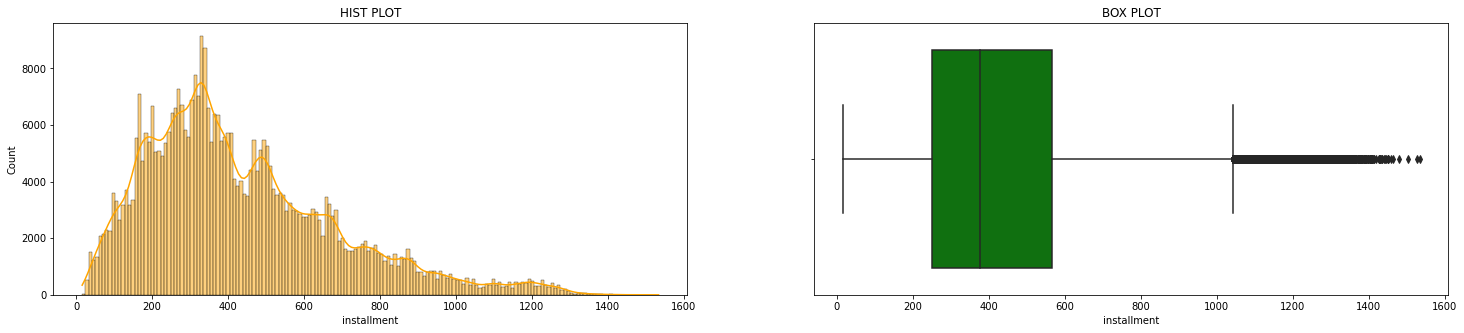

=======annual_inc===========
Describe Method
count    3.960300e+05
mean     7.420318e+04
std      6.163762e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.400000e+04
75%      9.000000e+04
max      8.706582e+06
Name: annual_inc, dtype: float64



Value count Method
60000.0    15313
50000.0    13303
65000.0    11333
70000.0    10674
40000.0    10629
45000.0    10114
80000.0     9971
75000.0     9850
55000.0     9195
90000.0     7573
Name: annual_inc, dtype: int64


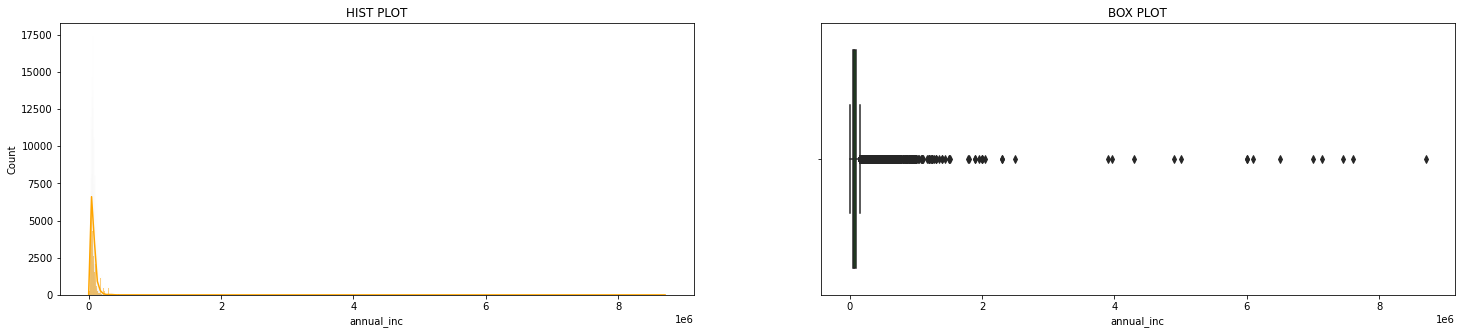

=======dti===========
Describe Method
count    396030.000000
mean         17.379514
std          18.019092
min           0.000000
25%          11.280000
50%          16.910000
75%          22.980000
max        9999.000000
Name: dti, dtype: float64



Value count Method
0.0     313
14.4    310
19.2    302
16.8    301
18.0    300
20.4    296
12.0    293
13.2    291
21.6    270
15.6    266
Name: dti, dtype: int64


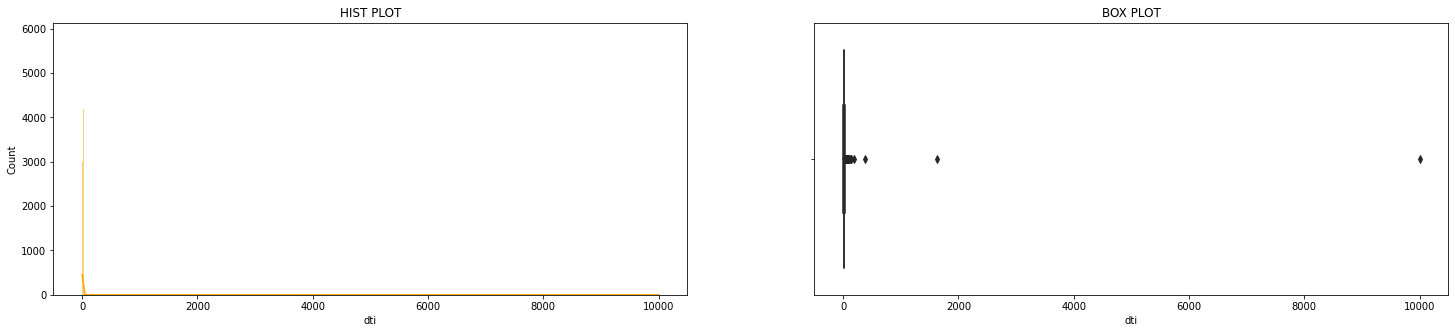

=======open_acc===========
Describe Method
count    396030.000000
mean         11.311153
std           5.137649
min           0.000000
25%           8.000000
50%          10.000000
75%          14.000000
max          90.000000
Name: open_acc, dtype: float64



Value count Method
9.0     36779
10.0    35441
8.0     35137
11.0    32695
7.0     31328
12.0    29157
6.0     25927
13.0    24983
14.0    21173
5.0     18308
Name: open_acc, dtype: int64


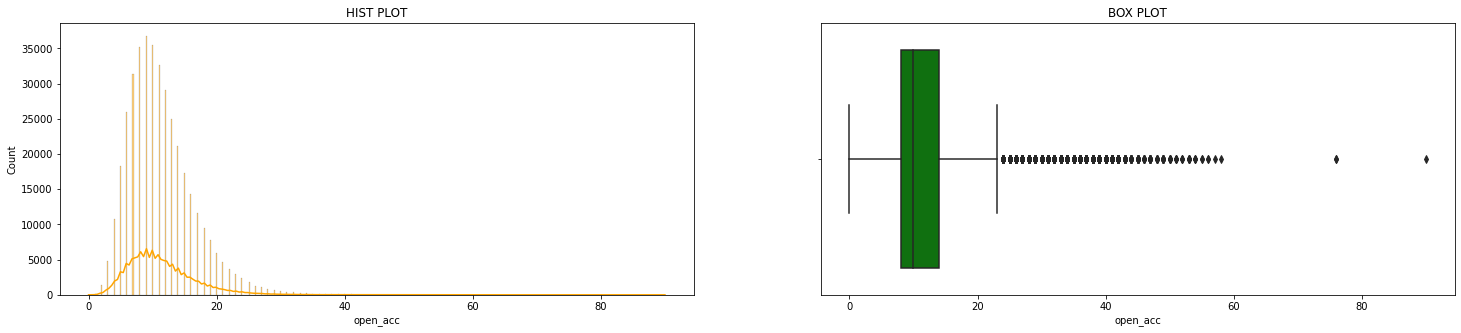

=======pub_rec===========
Describe Method
count    396030.000000
mean          0.178191
std           0.530671
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          86.000000
Name: pub_rec, dtype: float64



Value count Method
0.0    338272
1.0     49739
2.0      5476
3.0      1521
4.0       527
5.0       237
6.0       122
7.0        56
8.0        34
9.0        12
Name: pub_rec, dtype: int64


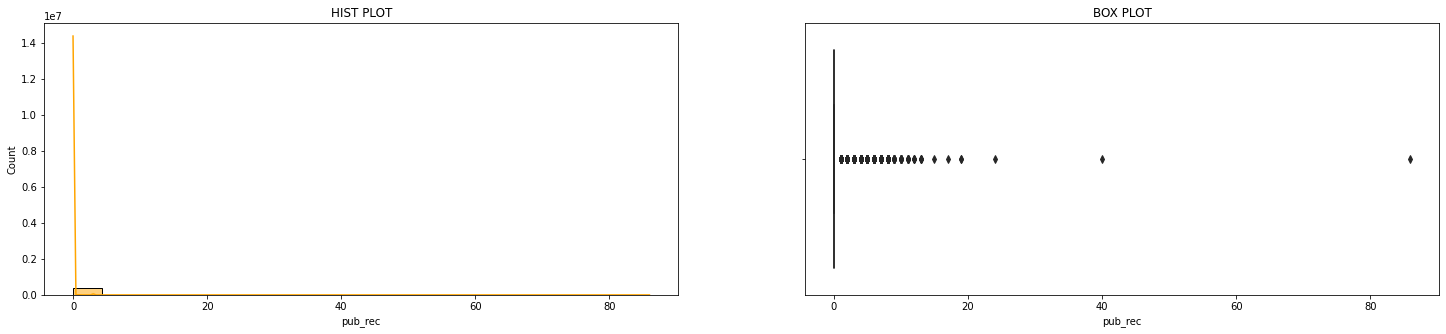

=======revol_bal===========
Describe Method
count    3.960300e+05
mean     1.584454e+04
std      2.059184e+04
min      0.000000e+00
25%      6.025000e+03
50%      1.118100e+04
75%      1.962000e+04
max      1.743266e+06
Name: revol_bal, dtype: float64



Value count Method
0.0       2128
5655.0      41
6095.0      38
7792.0      38
3953.0      37
5098.0      36
6077.0      36
8502.0      35
5235.0      35
5389.0      35
Name: revol_bal, dtype: int64


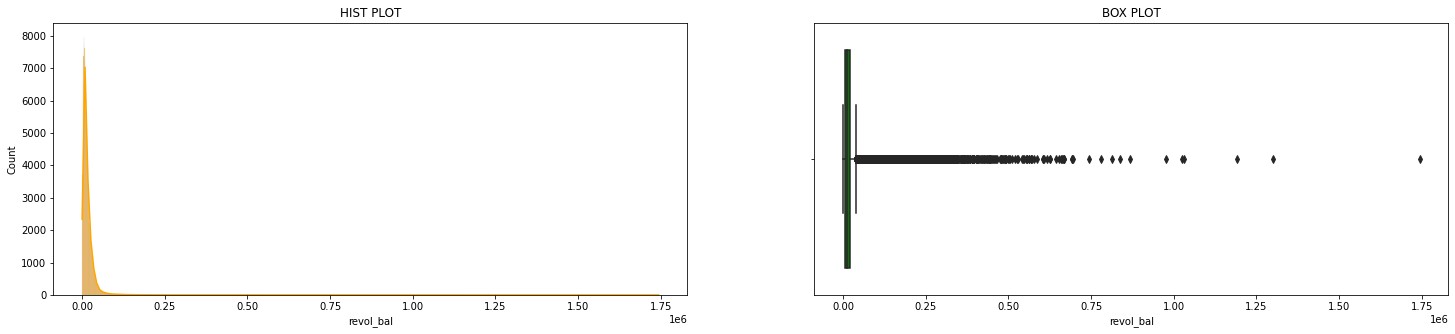

=======revol_util===========
Describe Method
count    396030.000000
mean         53.792451
std          24.443685
min           0.000000
25%          35.900000
50%          54.800000
75%          72.900000
max         892.300000
Name: revol_util, dtype: float64



Value count Method
0.0     2213
54.8     818
53.0     752
60.0     739
61.0     734
55.0     730
54.0     725
62.0     721
47.0     720
57.0     719
Name: revol_util, dtype: int64


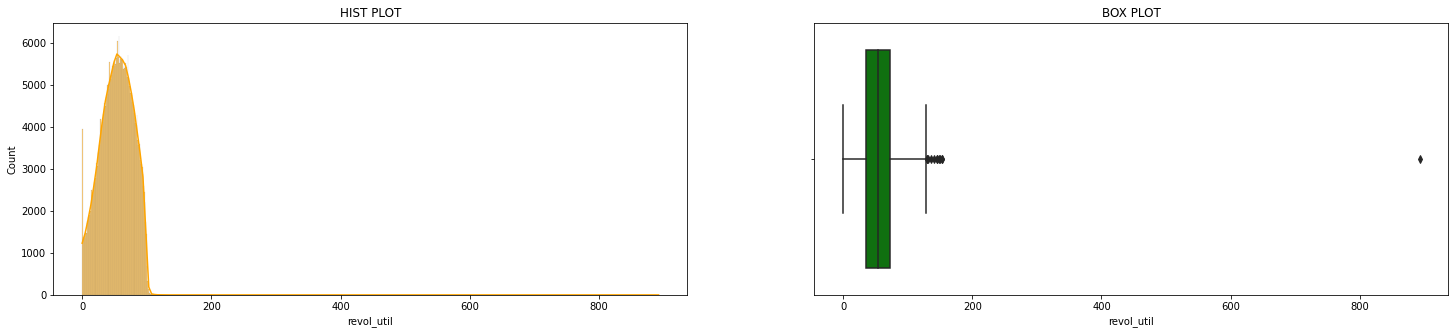

=======total_acc===========
Describe Method
count    396030.000000
mean         25.414744
std          11.886991
min           2.000000
25%          17.000000
50%          24.000000
75%          32.000000
max         151.000000
Name: total_acc, dtype: float64



Value count Method
21.0    14280
22.0    14260
20.0    14228
23.0    13923
24.0    13878
19.0    13876
18.0    13710
17.0    13495
25.0    13225
26.0    12799
Name: total_acc, dtype: int64


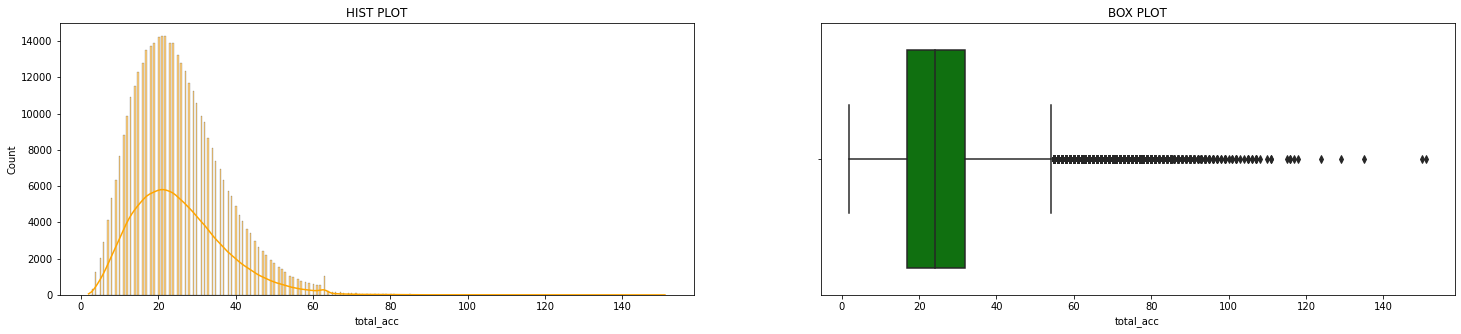

=======mort_acc===========
Describe Method
count    396030.000000
mean          1.736308
std           2.056819
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          34.000000
Name: mort_acc, dtype: float64



Value count Method
0.0    139777
1.0     98211
2.0     49948
3.0     38049
4.0     27887
5.0     18194
6.0     11069
7.0      6052
8.0      3121
9.0      1656
Name: mort_acc, dtype: int64


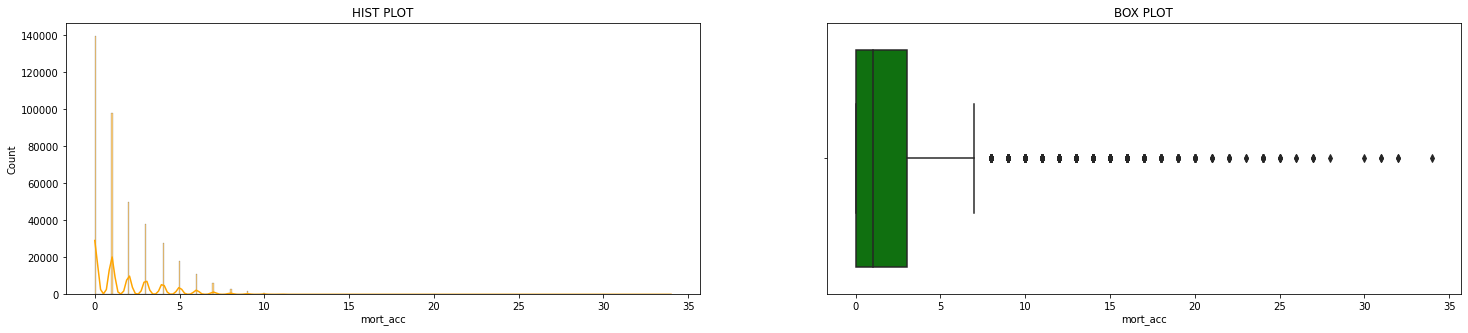

=======pub_rec_bankruptcies===========
Describe Method
count    396030.000000
mean          0.121483
std           0.355962
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: pub_rec_bankruptcies, dtype: float64



Value count Method
0.0    350915
1.0     42790
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: pub_rec_bankruptcies, dtype: int64


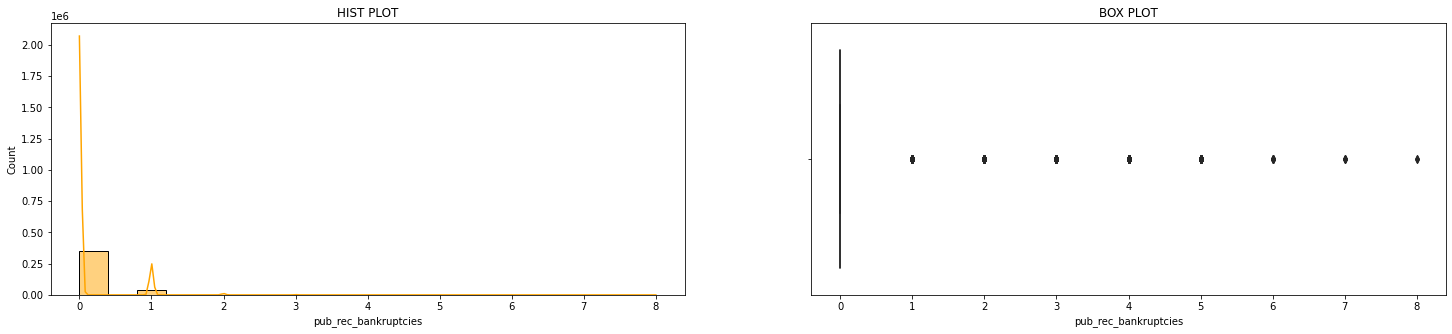

In [ ]:
for i in num_col:
  print(f"======={ i }===========")
  univariateNumerical(df, i)

<font color='#0dab7f'><b>Observation</b>:

<font color='#0dab7f'> 1) Loan amount - median value is 12000 , max value is 40000. Based on the value count most people taken loan amount range is 6000 to 12000

<font color='#0dab7f'> 2) Interest rate - median value is 13 % , max value is 31%. Based on the value count most people taken loan interest rate range is 11% to 17 %

<font color='#0dab7f'> 3) Installment - median value is 375 , max value is 1533. Based on the value count most people taken loan installment amount is 327

<font color='#0dab7f'> 4) annual income - Based on the value count most people annual income is around 60000

<font color='#0dab7f'> 5) dti - debt to income ratio for most of the borrowers is 14 and median is around 16

<font color='#0dab7f'> 6) open_acc - Most number of open credit lines is 9

<font color='#0dab7f'> 7) pub_rec - Number of derogratory public records for 3.3 lakhs borrowers is 0

<font color='#0dab7f'> 8) total_acc - Most total number borrowers credit line is around 20

<font color='#0dab7f'> 9) pub_rec_bankruptcies - Most number of public record bankruptcies is 0

In [ ]:
# Outlier
for i in num_col:
  print(f"======={ i }===========")
  outlier(df, i)

=======loan_amnt===========
 
OUTLIER FOR COLUMN : loan_amnt
Outliers: 191
Lower limit 0
Upper limit 38000.0 
=======int_rate===========
 
OUTLIER FOR COLUMN : int_rate
Outliers: 3777
Lower limit 1.4900000000000038
Upper limit 25.489999999999995 
=======installment===========
 
OUTLIER FOR COLUMN : installment
Outliers: 11250
Lower limit 0
Upper limit 1042.7549999999999 
=======annual_inc===========
 
OUTLIER FOR COLUMN : annual_inc
Outliers: 16700
Lower limit 0
Upper limit 157500.0 
=======dti===========
 
OUTLIER FOR COLUMN : dti
Outliers: 275
Lower limit 0
Upper limit 40.53 
=======open_acc===========
 
OUTLIER FOR COLUMN : open_acc
Outliers: 10307
Lower limit 0
Upper limit 23.0 
=======pub_rec===========
 
OUTLIER FOR COLUMN : pub_rec
Outliers: 57758
Lower limit 0.0
Upper limit 0.0 
=======revol_bal===========
 
OUTLIER FOR COLUMN : revol_bal
Outliers: 21259
Lower limit 0
Upper limit 40012.5 
=======revol_util===========
 
OUTLIER FOR COLUMN : revol_util
Outliers: 12
Lower limit 0


<font color='#0dab7f'><b>Observation</b>:

<font color='#0dab7f'> 1) Based on the IQR method all the numerical column has outliers and we can treat them after splitting the train data

In [ ]:
num_col1 = []
for i in cat_col:
  if df[i].nunique() > 36:
    num_col1.append(i)
print(num_col1)

['emp_title', 'issue_d', 'title', 'earliest_cr_line', 'address']


=======term===========
Describe Method
count     396030
unique         2
top           36
freq      302005
Name: term, dtype: object



Value count Method
36    302005
60     94025
Name: term, dtype: int64


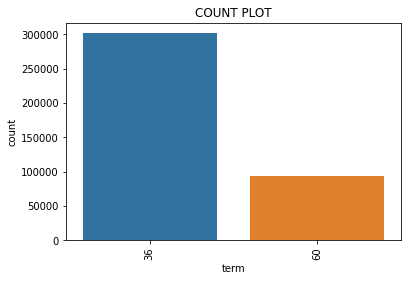

=======grade===========
Describe Method
count     396030
unique         7
top            B
freq      116018
Name: grade, dtype: object



Value count Method
B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: grade, dtype: int64


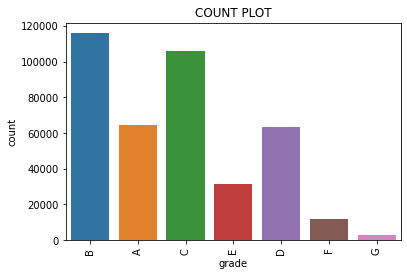

=======sub_grade===========
Describe Method
count     396030
unique        35
top           B3
freq       26655
Name: sub_grade, dtype: object



Value count Method
B3    26655
B4    25601
C1    23662
C2    22580
B2    22495
B5    22085
C3    21221
C4    20280
B1    19182
A5    18526
Name: sub_grade, dtype: int64


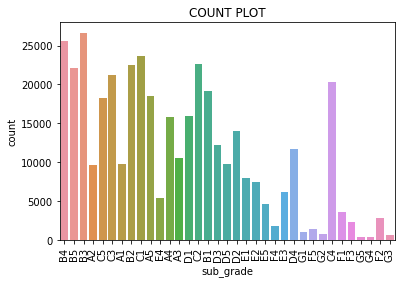

=======emp_length===========
Describe Method
count        396030
unique           11
top       10+ years
freq         144342
Name: emp_length, dtype: object



Value count Method
10+ years    144342
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
Name: emp_length, dtype: int64


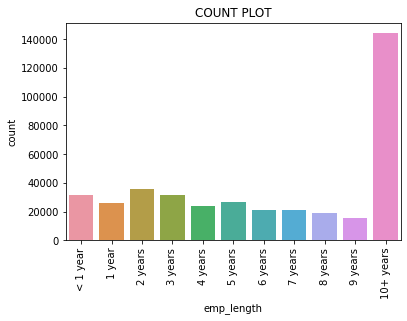

=======home_ownership===========
Describe Method
count       396030
unique           6
top       MORTGAGE
freq        198348
Name: home_ownership, dtype: object



Value count Method
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64


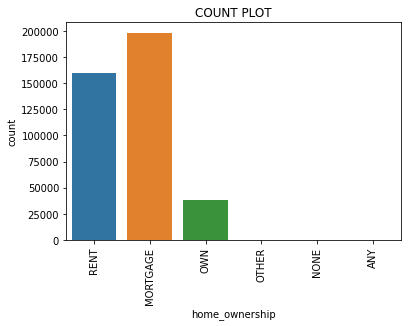

=======verification_status===========
Describe Method
count       396030
unique           3
top       Verified
freq        139563
Name: verification_status, dtype: object



Value count Method
Verified           139563
Source Verified    131385
Not Verified       125082
Name: verification_status, dtype: int64


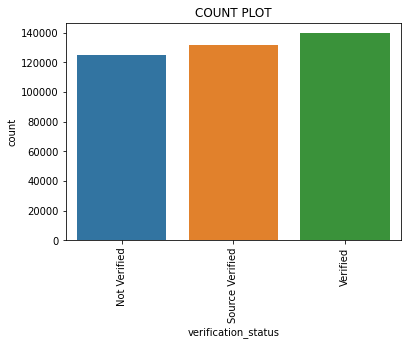

=======loan_status===========
Describe Method
count         396030
unique             2
top       Fully Paid
freq          318357
Name: loan_status, dtype: object



Value count Method
Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64


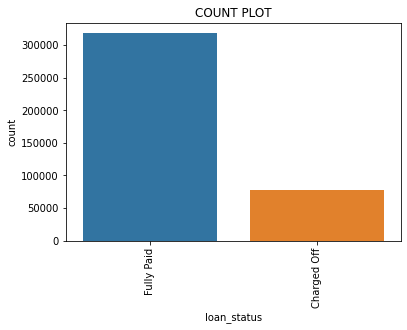

=======purpose===========
Describe Method
count                 396030
unique                    14
top       debt_consolidation
freq                  234507
Name: purpose, dtype: object



Value count Method
debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
Name: purpose, dtype: int64


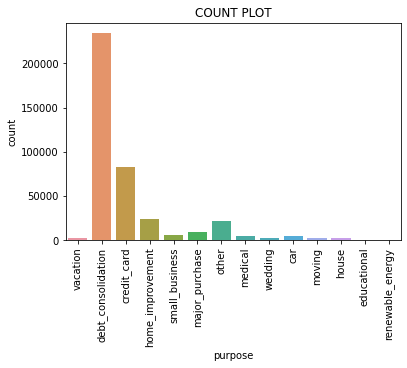

=======initial_list_status===========
Describe Method
count     396030
unique         2
top            f
freq      238066
Name: initial_list_status, dtype: object



Value count Method
f    238066
w    157964
Name: initial_list_status, dtype: int64


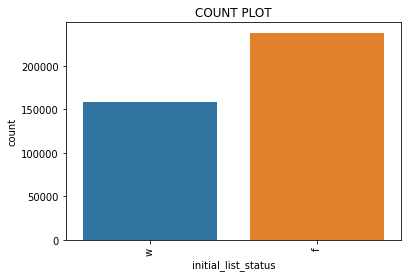

=======application_type===========
Describe Method
count         396030
unique             3
top       INDIVIDUAL
freq          395319
Name: application_type, dtype: object



Value count Method
INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64


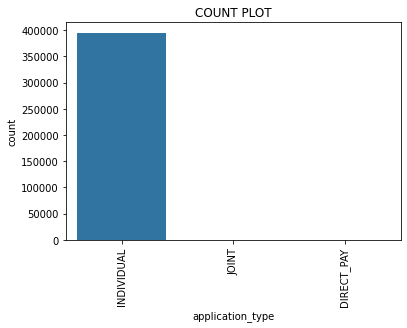

In [ ]:
for i in cat_col:
  if df[i].nunique() < 36:
    print(f"======={ i }===========")
    univariateDiscrete(df, i)

In [ ]:
df[num_col1]

,emp_title,issue_d,title,earliest_cr_line,address
0,Marketing,Jan-2015,Vacation,Jun-1990,OK
1,Credit analyst,Jan-2015,Debt consolidation,Jul-2004,SD
2,Statistician,Jan-2015,Credit card refinancing,Aug-2007,WV
3,Client Advocate,Nov-2014,Credit card refinancing,Sep-2006,MA
4,Destiny Management Inc.,Apr-2013,Credit Card Refinance,Mar-1999,VA
...,...,...,...,...,...
396025,licensed bankere,Oct-2015,Debt consolidation,Nov-2004,DC
396026,Agent,Feb-2015,Debt consolidation,Feb-2006,LA
396027,City Carrier,Oct-2013,pay off credit cards,Mar-1997,NY
396028,"Gracon Services, Inc",Aug-2012,Loanforpayoff,Nov-1990,FL


In [ ]:
df[num_col1].nunique()

emp_title           173105
issue_d                115
title                48817
earliest_cr_line       684
address                 52
dtype: int64

Teacher             27316
Manager              4250
Registered Nurse     1856
RN                   1846
Supervisor           1830
Sales                1638
Project Manager      1505
Owner                1410
Driver               1339
Office Manager       1218
Name: emp_title, dtype: int64


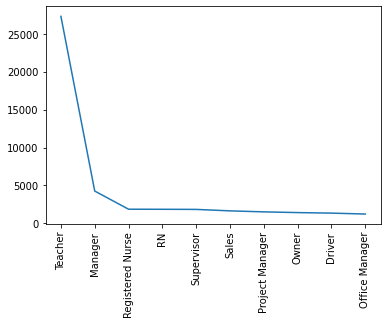

In [ ]:
emp_t = df['emp_title'].value_counts().head(10)
print(emp_t)
plt.xticks(rotation = 90)
plt.plot(emp_t)
plt.show()

<font color='#0dab7f'><b>Observation</b>: Name the top 2 afforded job titles ---- teacher and Manager

Debt consolidation         154227
Credit card refinancing     51487
Home improvement            15264
Other                       12930
Debt Consolidation          11608
Major purchase               4769
Consolidation                3852
debt consolidation           3547
Business                     2949
Debt Consolidation Loan      2864
Name: title, dtype: int64


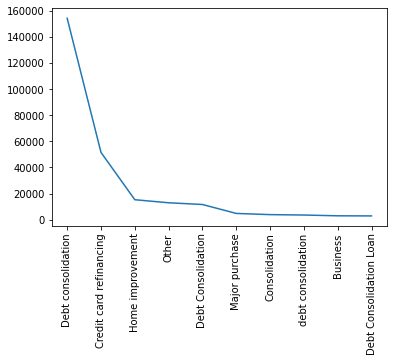

In [ ]:
t = df['title'].value_counts().head(10)
print(t)
plt.xticks(rotation = 90)
plt.plot(t)
plt.show()

Box    14060
NJ      7091
WI      7081
LA      7068
NV      7038
AK      7034
VA      7022
MA      7022
VT      7005
NY      7004
Name: address, dtype: int64


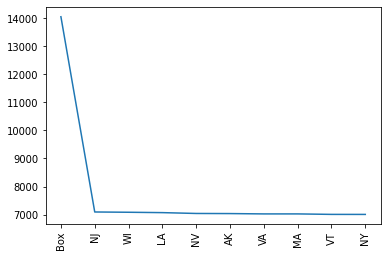

In [ ]:
add = df['address'].value_counts().head(10)
print(add)
plt.xticks(rotation = 90)
plt.plot(add)
plt.show()

<font color='#0dab7f'><b>Observation</b>:

<font color='#0dab7f'>1) There are only 2 terms 36 and 60 months. Most of borrowers has choosen 36 months term

<font color='#0dab7f'>2) Most of loan grade assigned to borrower is B and C . Max Subgrade with in B is B3 and Max sub grade within C is C1

<font color='#0dab7f'>3) Most of the borrowers has emploment length 10+ years

<font color='#0dab7f'>4) Most of the borrowers has mortgage loan

<font color='#0dab7f'>5) Loan status - Most of the loans are fully paid. It is target variable and data looks imbalanced

<font color='#0dab7f'>6) Most of the loan purpose reason is debt consolidation

<font color='#0dab7f'>7) Most of the borrowers are Indivdual

<font color='#0dab7f'> 8) Most of the borrowers are teachers

<font color='#0dab7f'> 9) Most of the borrowers are from New Jersey

**<font color='33A2FF'><b> Loan Status<b>**

In [ ]:
print((df['loan_status'].value_counts())/len(df))

Fully Paid     0.803871
Charged Off    0.196129
Name: loan_status, dtype: float64


Describe Method
count         396030
unique             2
top       Fully Paid
freq          318357
Name: loan_status, dtype: object



Value count Method
Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64


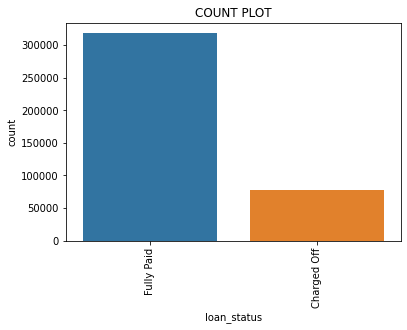

In [ ]:
univariateDiscrete(df, 'loan_status')

<font color='#0dab7f'><b>Observation</b>: <b>19%</b> of the applicants <b>Charged off</b>.</font>

<font color='#0dab7f'> What percentage of customers have fully paid their Loan Amount? ------- 80% of customers have fully paid the loan amount

**<font color='33A2FF'><b> Loan Purpose<b>**

debt_consolidation    0.592145
credit_card           0.209628
home_improvement      0.060677
other                 0.053493
major_purchase        0.022195
small_business        0.014395
car                   0.011860
medical               0.010595
moving                0.007207
vacation              0.006191
house                 0.005558
wedding               0.004575
renewable_energy      0.000831
educational           0.000649
Name: purpose, dtype: float64



[]

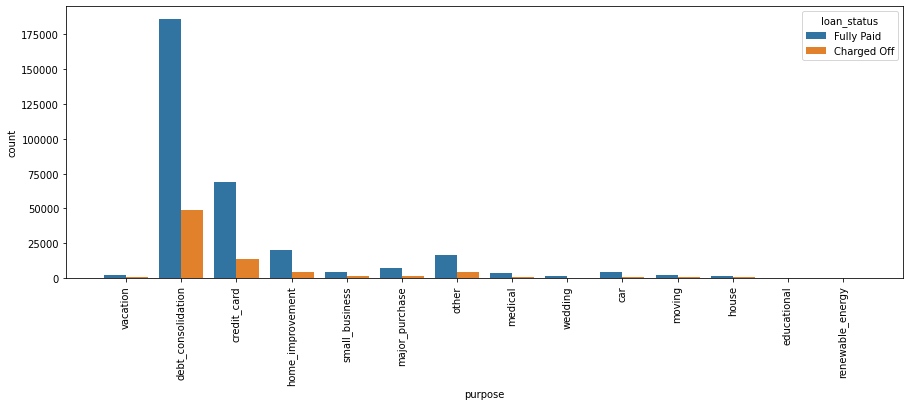

In [ ]:
print((df['purpose'].value_counts())/len(df))
print()
plt.figure(figsize=(15,5))
sns.countplot(data = df, x= 'purpose', hue= 'loan_status')
plt.xticks(rotation = 90)
plt.plot()

<font color='#0dab7f'><b>Observation</b>:  Approx <b>52%</b> of the applicants 
applied loan for paying their other loans<b>(Debt Consolidation)

<font color='#0dab7f'> Small Business</b> Looks more <b>risky</b>.</font>

**<font color='33A2FF'><b> Home Ownership wise Loan<b>**

MORTGAGE    0.500841
RENT        0.403480
OWN         0.095311
OTHER       0.000283
NONE        0.000078
ANY         0.000008
Name: home_ownership, dtype: float64



[]

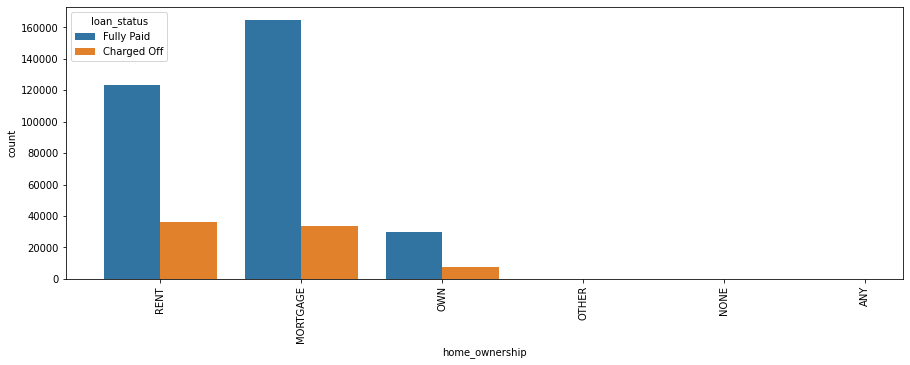

In [ ]:
print((df['home_ownership'].value_counts())/len(df))
print()
plt.figure(figsize=(15,5))
sns.countplot(data = df, x= 'home_ownership', hue= 'loan_status')
plt.xticks(rotation = 90)
plt.plot()

<font color='#0dab7f'><b>Observation</b>: <b>40%</b> of applicants are living in <b>rented home</b> whereas <b>50% </b>applicants were <b>mortagaged</b> their home.</font>

<font color='#0dab7f'> The majority of people have home ownership as _______Mortgaged their home

#### Year wise Loan

2014    0.259728
2013    0.246603
2015    0.238022
2012    0.104038
2016    0.070924
2011    0.044024
2010    0.023377
2009    0.009661
2008    0.003131
2007    0.000492
Name: issue_year, dtype: float64



[]

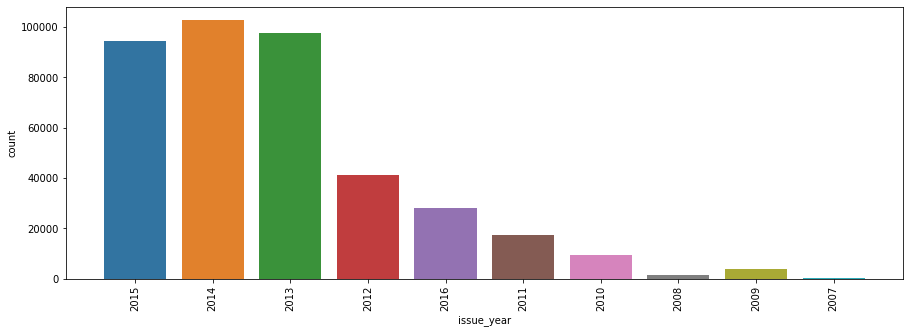

In [ ]:
print((df['issue_year'].value_counts())/len(df))
print()
plt.figure(figsize=(15,5))
sns.countplot(data = df, x= 'issue_year')  #hue= 'loan_status'
plt.xticks(rotation = 90)
plt.plot()

<font color='#0dab7f'><b>Observation</b>: loan applicants are increasing year on year, approx <b>25%</b> of loan applicants received loans in <b>2014</b></font>

#### Loan Term

36    0.762581
60    0.237419
Name: term, dtype: float64



[]

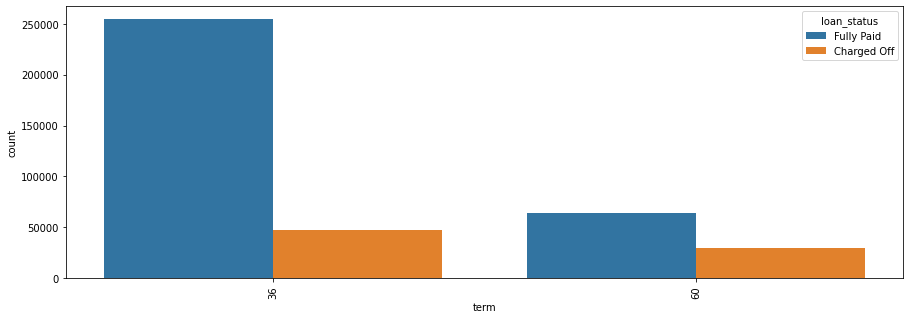

In [ ]:
print((df['term'].value_counts())/len(df))
print()
plt.figure(figsize=(15,5))
sns.countplot(data = df, x= 'term', hue= 'loan_status')
plt.xticks(rotation = 90)
plt.plot()

<font color='#0dab7f'><b>Observation</b>: <b>76%</b> of applicants applied loan for <b>36 months</b> term period.</font>

**<font color='33A2FF'><b> BIVARIATE / MULTIVARIATE ANALYSIS<b>**

**<font color='33A2FF'><b> Purpose of Loan vs Loan Amount for each Loan Status<b>**

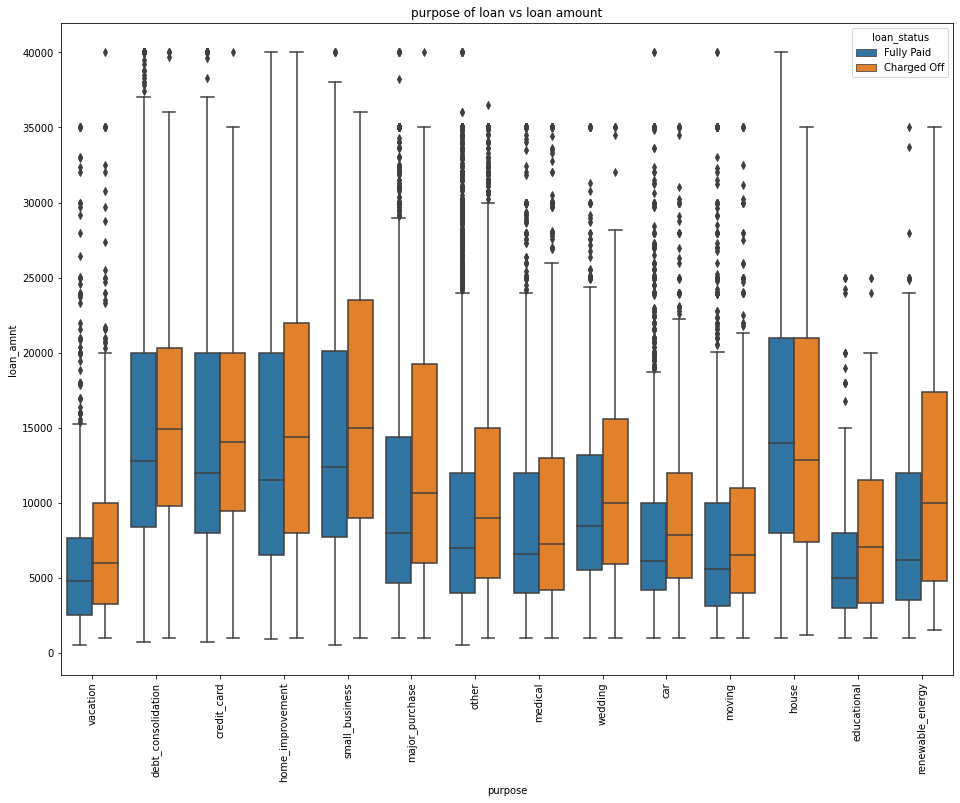

In [ ]:
plt.figure(figsize=(16,12))
sns.boxplot(data = df, x='purpose', y='loan_amnt', hue='loan_status')
plt.title('purpose of loan vs loan amount')
plt.xticks(rotation=90)
plt.show()

<font color='#0dab7f'><b>Observation</b>: Charge off is more for small business and renewable energy

**<font color='33A2FF'><b> Correlation Matrix : All Continuos(Numeric) Variables <b>**

In [ ]:
df_correlation=df.corr()
df_correlation

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,pub_rec_flag,mort_acc_flag,pub_rec_bankruptcies_flag
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099851,0.223886,0.222366,-0.106227,-0.027789,0.220650,-0.027837
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293561,-0.036404,-0.065296,0.057734,0.036631,-0.054173,0.021520
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123841,0.202430,0.198043,-0.098344,-0.021382,0.199140,-0.025444
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027861,0.193023,0.225687,-0.050043,0.010399,0.196814,-0.009160
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088363,0.102128,-0.016946,-0.014384,-0.012845,0.001661,-0.006361
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131362,0.680728,0.118213,-0.027534,-0.009732,0.129318,-0.007626
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075912,0.019723,0.020364,0.699380,0.655420,0.036450,0.330587
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226152,0.191616,0.192332,-0.124405,-0.044911,0.182652,-0.034154
revol_util,0.099851,0.293561,0.123841,0.027861,0.088363,-0.131362,-0.075912,0.226152,1.000000,-0.104248,0.012842,-0.086408,-0.041017,0.018679,-0.035614
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104248,1.000000,0.370924,0.042229,-0.001264,0.331766,0.016296


**<font color='33A2FF'><b> HeatMap: All continuos variablese <b>**

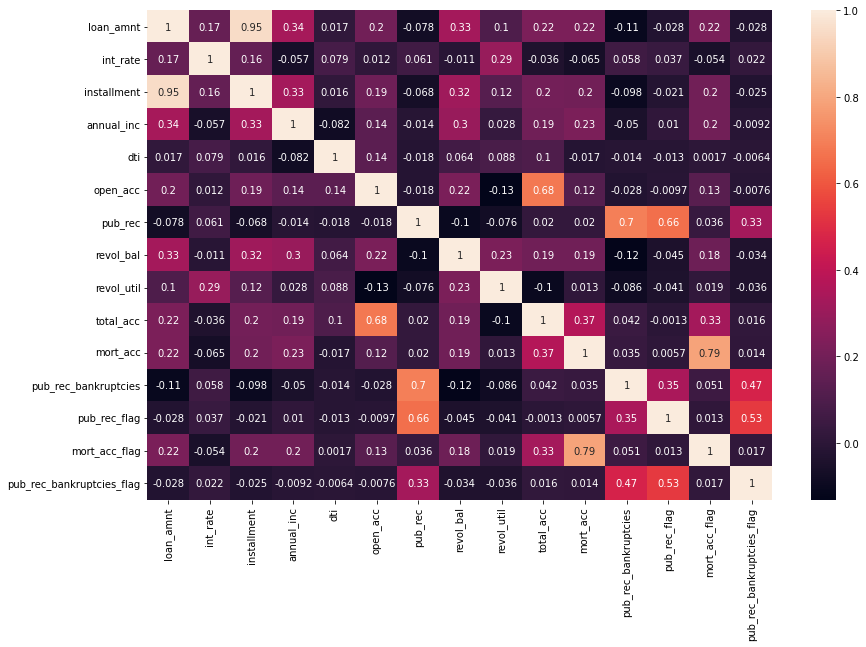

In [ ]:
f,ax=plt.subplots(figsize=(14,9))
sns.heatmap(data=df_correlation, xticklabels=df_correlation.columns.values, 
            yticklabels=df_correlation.columns.values, annot=True)
plt.show()

<font color='#0dab7f'><b>Observation</b>: <b>'pub_rec_bankrupticies','pub_rec_flag' and 'pub_rec_bankrupticies_flag'</b> are <b>closely interrelated</b>. 

<font color='#0dab7f'> <b>'mort_acc','mort_acc_flag'</b> are <b>closely interrelated</b>.

<font color='#0dab7f'> <b> 'loan_amnt' and 'installment' </b> are <b>closely interrelated</b>. 

<font color='#0dab7f'> we can analyse any one </font>

In [ ]:
# Comment about the correlation between Loan Amount and Installment features.
# Based on the above correlation matrix installment and loan amount are closely related.

In [ ]:
# Multicollinearity check by VIF score (variables are dropped one-by-one till none has VIF>5)

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
temp = df[num_col]
vif['features'] = temp.columns
vif['VIF'] = [variance_inflation_factor(temp.values, i) for i in range(temp.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                features    VIF
2            installment  44.70
0              loan_amnt  44.62
9              total_acc  12.24
5               open_acc  11.38
1               int_rate   9.10
8             revol_util   6.30
3             annual_inc   2.94
11  pub_rec_bankruptcies   2.23
10              mort_acc   2.20
6                pub_rec   2.19
7              revol_bal   2.07
4                    dti   2.01


<font color='#0dab7f'><b>Observation</b>:
Comment about the correlation between Loan Amount and Installment features.

<font color='#0dab7f'> 'loan_amnt' and 'installment' have high variation inflation factor of 44, hence we can drop any one variable for model building.

**<font color='33A2FF'><b> Employment Length vs Loan Amount for each Loan Purpose <b>**

In [ ]:
df_chargedoff = df[df['loan_status'] == 'Charged Off']
df_chargedoff.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec_bankruptcies,address,pub_rec_flag,mort_acc_flag,pub_rec_bankruptcies_flag,issue_month,issue_year,loan_amnt_range,annual_inc_range,int_rate_range
4,24375.0,60,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,VA,0,0,0,Apr,2013,20000-25000,50000-75000,15 and above
25,6000.0,36,11.36,197.47,B,B5,CSU Monterey Bay,2 years,RENT,46680.0,...,0.0,AZ,0,0,0,Apr,2010,5000-10000,25000-50000,10-12.5
26,8400.0,36,13.35,284.45,C,C2,Bartender,6 years,RENT,35000.0,...,0.0,NaN,0,0,0,Jun,2014,5000-10000,25000-50000,12.5-15
36,3250.0,36,16.78,115.52,C,C5,Teacher,10+ years,RENT,22500.0,...,0.0,TN,0,0,0,Aug,2013,0-5000,0-25000,15 and above
41,28000.0,60,19.91,312.04,E,E4,American Airlines,10+ years,RENT,52000.0,...,0.0,CT,0,0,0,Dec,2011,25000 and above,50000-75000,15 and above


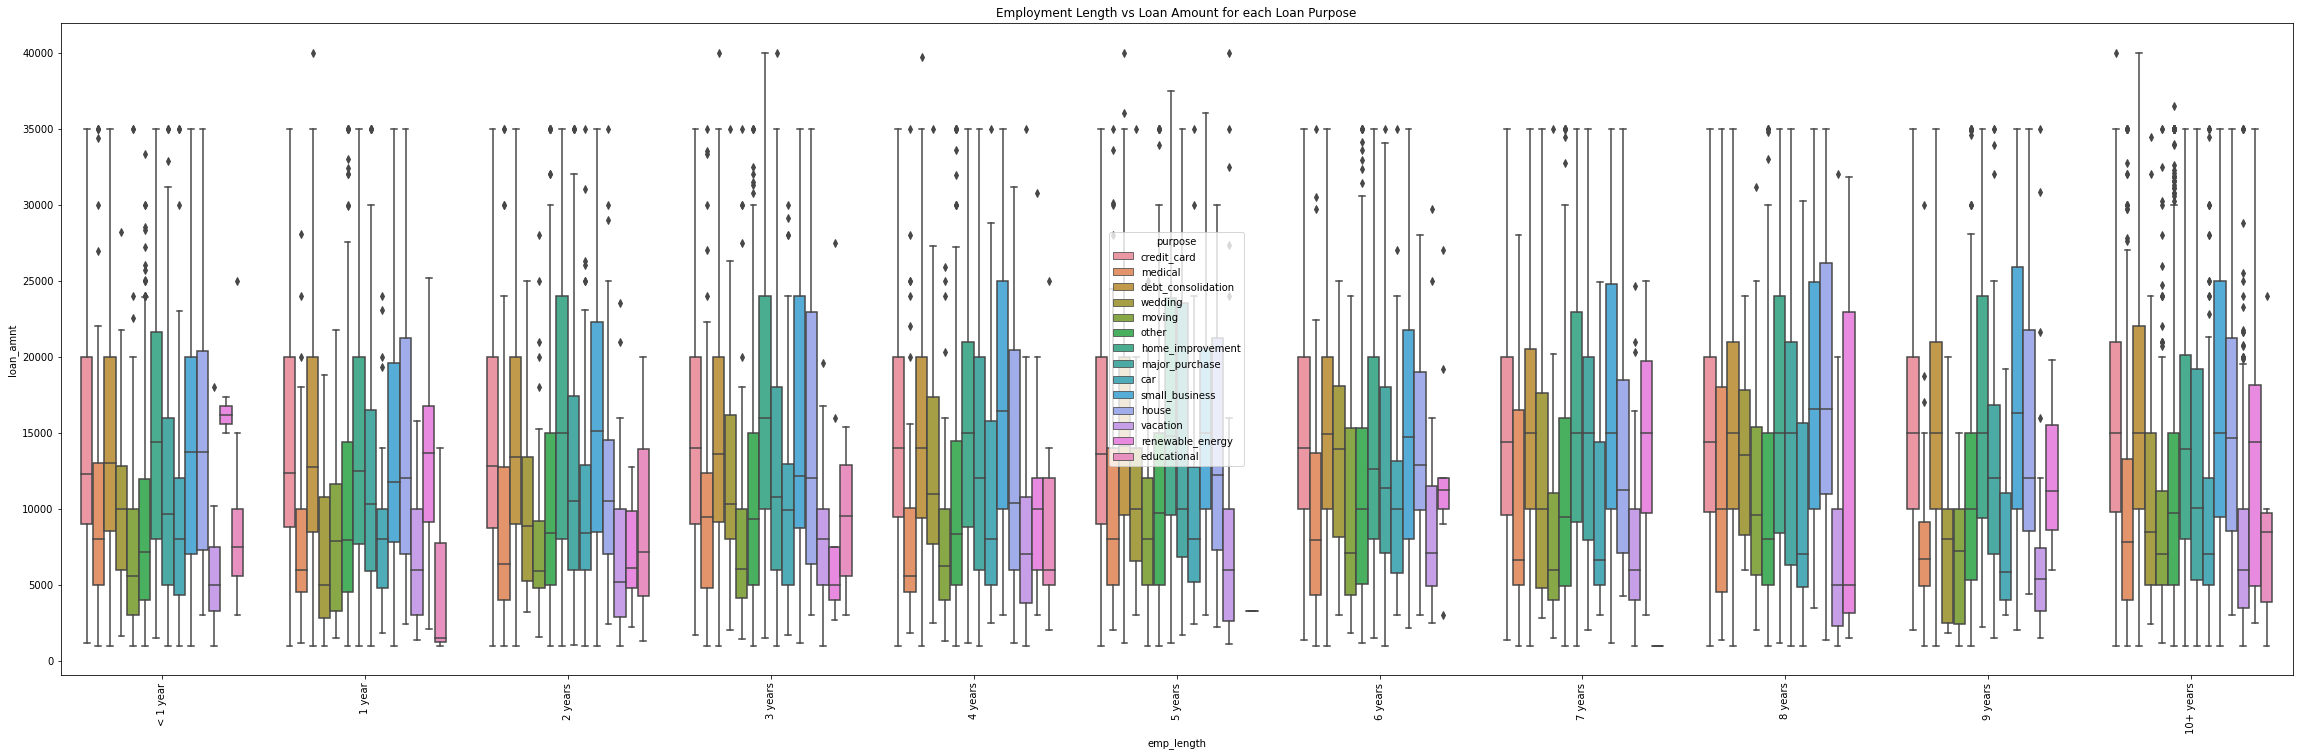

In [ ]:
plt.figure(figsize=(40,12))
sns.boxplot(data = df_chargedoff, x='emp_length', y='loan_amnt', hue='purpose')
plt.title('Employment Length vs Loan Amount for each Loan Purpose')
plt.xticks(rotation=90)
plt.show()

In [ ]:
def crosstab(dataframe, col):
    crosstab = pd.crosstab(dataframe[col], dataframe['loan_status'], margins=True)     # cross tab between given column  and loan status
    crosstab['Probability_Charged Off'] = round((crosstab['Charged Off']/(crosstab['Charged Off'] + crosstab['Fully Paid'])), 2)  # new column probability charge off = chargeoff / chargeoff + fully paid 
    return crosstab  

In [ ]:
# Probability of charge off
def bivariateProbability(dataframe, col, stacked=True):
      # get dataframe from crosstab function
      plotCrosstab = crosstab(dataframe, col)                                   

      # We don't need to plot for All/summary after taking cross tab
      plotCrosstab.drop(['All'], inplace=True, axis=0)
      linePlot = plotCrosstab[['Probability_Charged Off']]       # line plot for prabability charge off value

      # Drop Current loans as outcome is not known
      #plotCrosstabx = plotCrosstab.drop(['Current'],  axis=1)
      plotCrosstabx = plotCrosstab[['Fully Paid', 'Charged Off']]     # bar plot for fully paid and charged off

      barPlot = plotCrosstabx.iloc[:,0:2]

      ax = linePlot.plot(figsize=(20,8), marker='o',color = 'b')
      ax2 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True,stacked=stacked)
      ax.set_title(dataframe[col].name.title()+' vs Probability Charge Off',fontsize=20,weight="bold")
     
      ax.set_xlabel(dataframe[col].name.title(),fontsize=14)
      ax.set_ylabel('Probability of Charged off',color = 'b',fontsize=14)
    
      ax2.set_ylabel('Number of Applicants',color = 'g',fontsize=14)
    
      plt.show()   

**<font color='33A2FF'><b> Location vs Probability Charge Off <b>**

In [ ]:
# Drop states less than 15 

filter_states=df.address.value_counts()
filter_states = filter_states[filter_states < 15]
loan_filter_states = df.drop(labels=df[df.address.isin(filter_states.index)].index)

loan_status,Charged Off,Fully Paid,All,Probability_Charged Off
address,,,,
AK,1390,5644,7034,0.20
AL,1348,5550,6898,0.20
AR,1381,5588,6969,0.20
AZ,1360,5558,6918,0.20
Box,2805,11255,14060,0.20
CA,1314,5584,6898,0.19
CO,1346,5568,6914,0.19
CT,1341,5563,6904,0.19
DC,1338,5504,6842,0.20


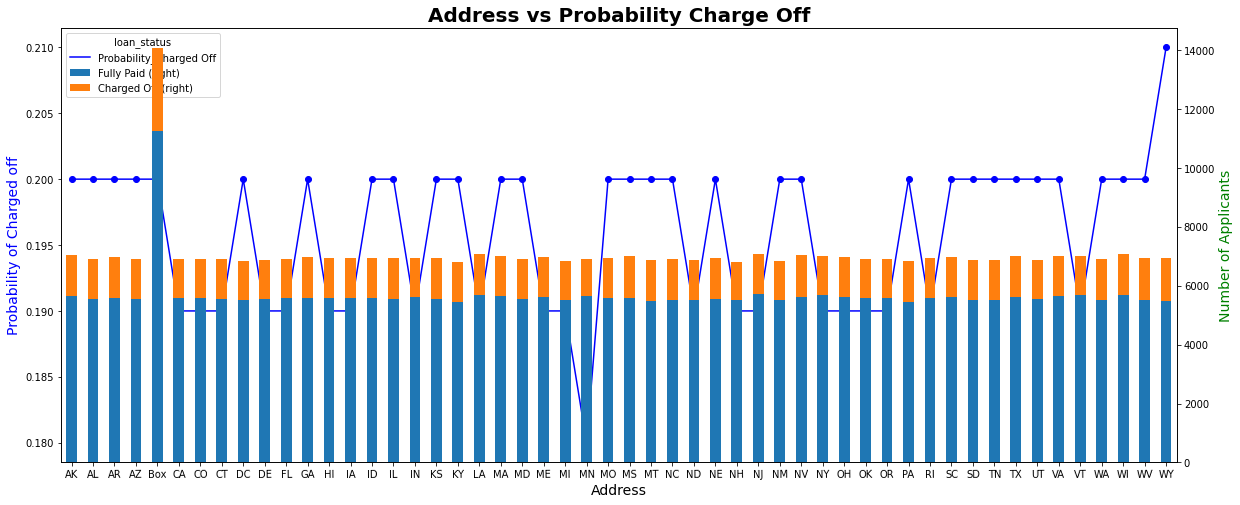

In [ ]:
states = crosstab(loan_filter_states,'address')
display(states)

bivariateProbability(loan_filter_states,'address')

<font color='#0dab7f'><b>Observation</b>: Highest Probability of Charged Off is in <b>WY State.</b></font>

**<font color='33A2FF'><b> Purpose of Loan vs Probability Charge Off <b>**

loan_status,Charged Off,Fully Paid,All,Probability_Charged Off
purpose,,,,
car,633,4064,4697,0.13
credit_card,13874,69145,83019,0.17
debt_consolidation,48640,185867,234507,0.21
educational,42,215,257,0.16
home_improvement,4087,19943,24030,0.17
house,434,1767,2201,0.20
major_purchase,1448,7342,8790,0.16
medical,911,3285,4196,0.22
moving,670,2184,2854,0.23


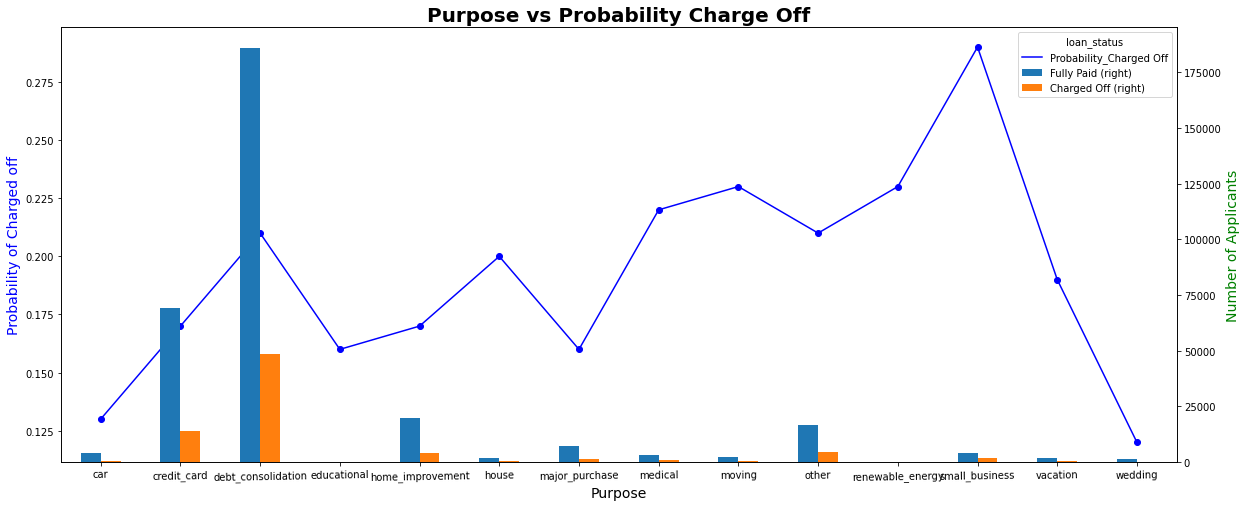

In [ ]:
purpose = crosstab(df,'purpose')
display(purpose)
bivariateProbability(df,'purpose',False)

<font color='#0dab7f'><b>Observation</b>: Highest Probability of Charged Off is for purpose: <b>Small Business - To be considered in Charge Off prediction</b></font>

**<font color='33A2FF'><b> Grade/Subgrade vs Probability Charge Off <b>**

loan_status,Charged Off,Fully Paid,All,Probability_Charged Off
grade,,,,
A,4036,60151,64187,0.06
B,14587,101431,116018,0.13
C,22449,83538,105987,0.21
D,18338,45186,63524,0.29
E,11765,19723,31488,0.37
F,5037,6735,11772,0.43
G,1461,1593,3054,0.48
All,77673,318357,396030,0.20


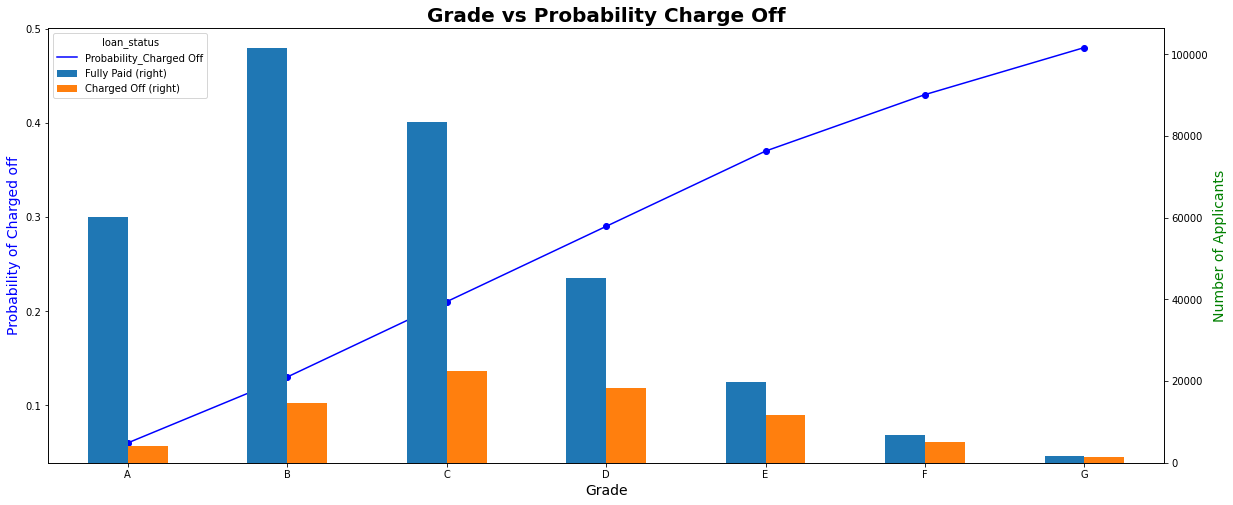

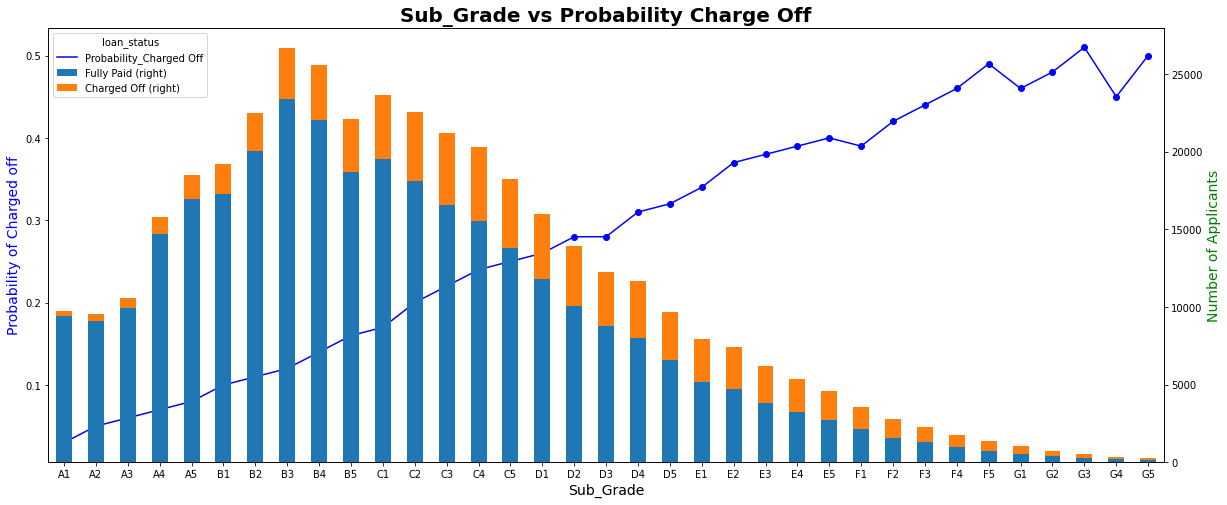

In [ ]:
grade = crosstab(df, 'grade')
display(grade)

bivariateProbability(df, 'grade', False)
bivariateProbability(df, 'sub_grade')

<font color='#0dab7f'><b>Observation</b>: Highest Probability of Charged Off is for Grade: <b>G - To be considered in Charge Off prediction</b>, With reduction in Grade, probability of charge-off increases</font>

**<font color='33A2FF'><b> Annual Income Range vs Probability Charge Off <b>**

loan_status,Charged Off,Fully Paid,All,Probability_Charged Off
annual_inc_range,,,,
0-25000,3856,10813,14669,0.26
25000-50000,27011,89500,116511,0.23
50000-75000,24547,99044,123591,0.20
75000-100000,12238,60638,72876,0.17
100000 and above,10012,58305,68317,0.15
All,77664,318300,395964,0.20


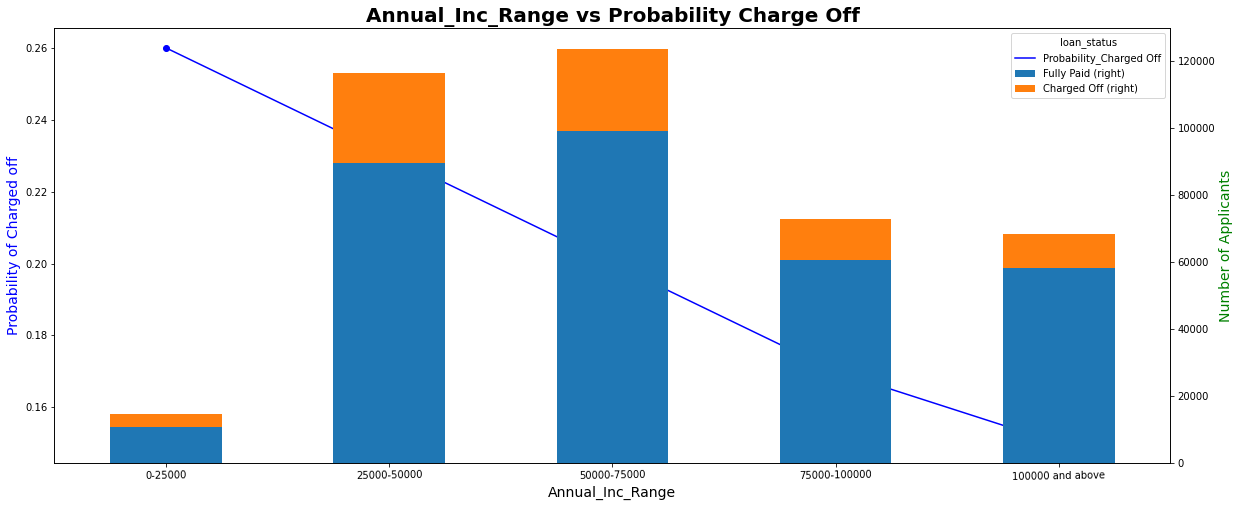

In [ ]:
annual_inc_range=crosstab(df, 'annual_inc_range')
display(annual_inc_range)
bivariateProbability(df, 'annual_inc_range', )

<font color='#0dab7f'><b>Observation</b>: Highest Probability of Charged Off is for <b>Lower Income Group - To be considered in Charge Off prediction</b>. With increase in Annual Income, probability of charge off reduces</font>

**<font color='33A2FF'><b> Interest rate Range vs Probability Charge Off <b>**

loan_status,Charged Off,Fully Paid,All,Probability_Charged Off
int_rate_range,,,,
0-7.5,1422,28331,29753,0.05
"7,5-10",5670,56398,62068,0.09
10-12.5,10463,66165,76628,0.14
12.5-15,17757,71788,89545,0.20
15 and above,29670,75908,105578,0.28
All,64982,298590,363572,0.18


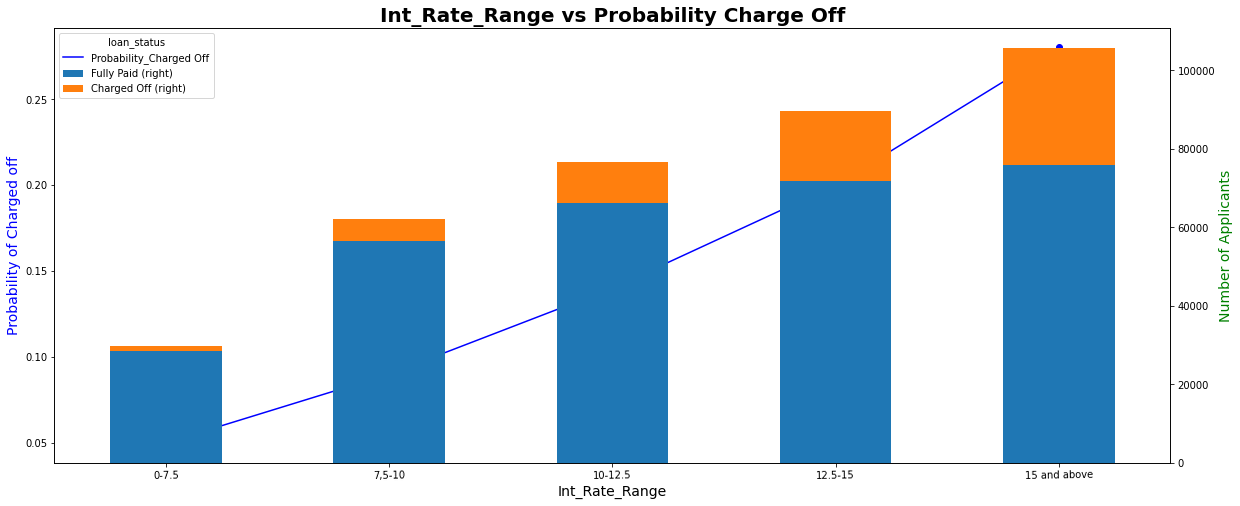

In [ ]:
int_rate_range = crosstab(df, 'int_rate_range')
display(int_rate_range)

bivariateProbability(df, 'int_rate_range')

<font color='#0dab7f'><b>Observation</b>: Highest Probability of Charged Off is for <b> High interest rate (at 15% and above probability is 28%)To be considered in Charge Off prediction</b>. With increase in interest rate, probability of charge off increases</font>

**<font color='33A2FF'><b> Employment Length vs Probability Charge Off <b>**


loan_status,Charged Off,Fully Paid,All,Probability_Charged Off
emp_length,,,,
< 1 year,6563,25162,31725,0.21
1 year,5154,20728,25882,0.20
2 years,6924,28903,35827,0.19
3 years,6182,25483,31665,0.20
4 years,4608,19344,23952,0.19
5 years,5092,21403,26495,0.19
6 years,3943,16898,20841,0.19
7 years,4055,16764,20819,0.19
8 years,3829,15339,19168,0.20


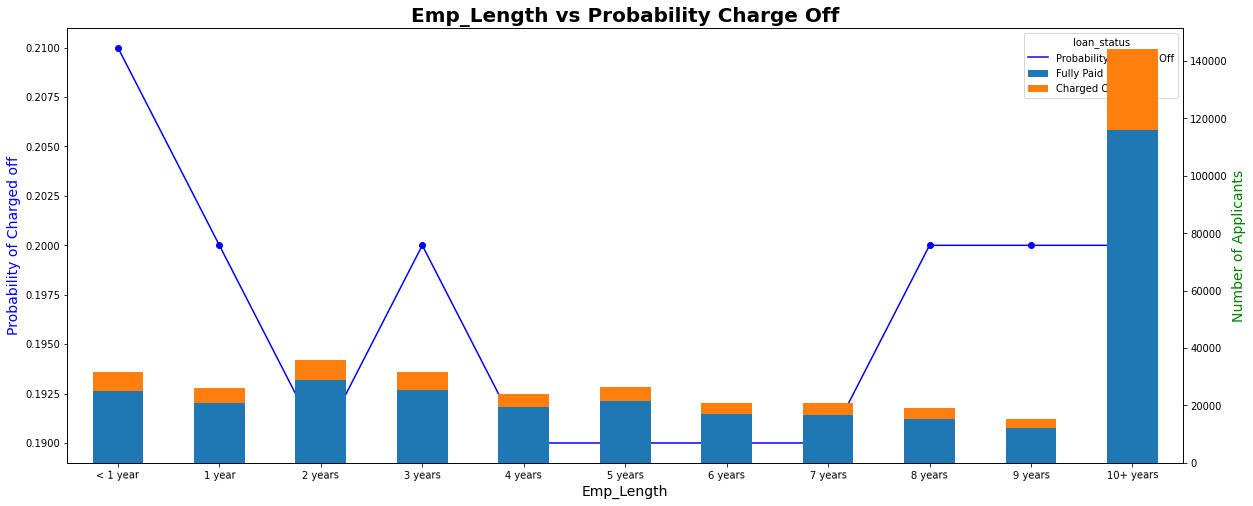

In [ ]:
emp_length=crosstab(df, 'emp_length')
display(emp_length)
bivariateProbability(df, 'emp_length')

<font color='#0dab7f'><b>Observation</b>: Highest Probability of Charged Off is for : <b>Self Employed(<1year) - To be considered in Charge Off prediction</b></font>

In [ ]:
crosstab1 = pd.crosstab(df['grade'], df['loan_status'], margins=True)
crosstab1['Probability_Fully paid'] = round((crosstab1['Fully Paid']/(crosstab1['Charged Off'] + crosstab1['Fully Paid'])), 2)

In [ ]:
crosstab1

loan_status,Charged Off,Fully Paid,All,Probability_Fully paid
grade,,,,
A,4036,60151,64187,0.94
B,14587,101431,116018,0.87
C,22449,83538,105987,0.79
D,18338,45186,63524,0.71
E,11765,19723,31488,0.63
F,5037,6735,11772,0.57
G,1461,1593,3054,0.52
All,77673,318357,396030,0.80


<font color='#0dab7f'><b>Observation</b>: Grade A has highest probability of fully paying the loan

<font color='#0dab7f'> People with grades ‘A’ are more likely to fully pay their loan. (T/F) ------True

**<font color='33A2FF'><b> Target Variable <b>**

* <font color='blue'><b>Loan Status - Charged Off</b></font>

**<font color='33A2FF'><b> Target Variable is dependent on </b>**
1. <font color='blue'><b>Purpose of Loan - Small Business</b></font>
2. <font color='blue'><b>Grade - Grade G</b></font>
3. <font color='blue'><b>Income Level - Low Income Group</b></font>
4. <font color='blue'><b>Interest Rate - High interest rates</b></font>
5. <font color='blue'><b>Experience Level - Self Employed</b></font>

In [ ]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'pub_rec_flag',
       'mort_acc_flag', 'pub_rec_bankruptcies_flag', 'issue_month',
       'issue_year', 'loan_amnt_range', 'annual_inc_range', 'int_rate_range'],
      dtype='object')

In [ ]:
df[['purpose', 'grade', 'annual_inc', 'int_rate', 'emp_length']].head()

,purpose,grade,annual_inc,int_rate,emp_length
0,vacation,B,117000.0,11.44,10+ years
1,debt_consolidation,B,65000.0,11.99,4 years
2,credit_card,B,43057.0,10.49,< 1 year
3,credit_card,A,54000.0,6.49,6 years
4,credit_card,C,55000.0,17.27,9 years


In [ ]:
num_col2 = df.describe(include=[np.number]).columns
cat_col2 = df.describe(include=object).columns

In [ ]:
cat_col2

Index(['term', 'grade', 'sub_grade', 'emp_title', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'earliest_cr_line', 'initial_list_status', 'application_type',
       'address', 'issue_year'],
      dtype='object')

In [ ]:
num_col2

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'pub_rec_flag', 'mort_acc_flag',
       'pub_rec_bankruptcies_flag'],
      dtype='object')

In [ ]:
df[num_col2]

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,pub_rec_flag,mort_acc_flag,pub_rec_bankruptcies_flag
0,10000.0,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0,0,0,0
1,8000.0,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0,0,1,0
2,15600.0,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0,0,0,0
3,7200.0,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0,0,0,0
4,24375.0,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,10.99,217.38,40000.0,15.63,6.0,0.0,1990.0,34.3,23.0,0.0,0.0,0,0,0
396026,21000.0,12.29,700.42,110000.0,21.45,6.0,0.0,43263.0,95.7,8.0,1.0,0.0,0,0,0
396027,5000.0,9.99,161.32,56500.0,17.56,15.0,0.0,32704.0,66.9,23.0,0.0,0.0,0,0,0
396028,21000.0,15.31,503.02,64000.0,15.88,9.0,0.0,15704.0,53.8,20.0,5.0,0.0,0,1,0


In [ ]:
df[cat_col2]

,term,grade,sub_grade,emp_title,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address,issue_year
0,36,B,B4,Marketing,RENT,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,Jun-1990,w,INDIVIDUAL,OK,2015
1,36,B,B5,Credit analyst,MORTGAGE,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,Jul-2004,f,INDIVIDUAL,SD,2015
2,36,B,B3,Statistician,RENT,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,Aug-2007,f,INDIVIDUAL,WV,2015
3,36,A,A2,Client Advocate,RENT,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,Sep-2006,f,INDIVIDUAL,MA,2014
4,60,C,C5,Destiny Management Inc.,MORTGAGE,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,Mar-1999,f,INDIVIDUAL,VA,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,60,B,B4,licensed bankere,RENT,Source Verified,Oct-2015,Fully Paid,debt_consolidation,Debt consolidation,Nov-2004,w,INDIVIDUAL,DC,2015
396026,36,C,C1,Agent,MORTGAGE,Source Verified,Feb-2015,Fully Paid,debt_consolidation,Debt consolidation,Feb-2006,f,INDIVIDUAL,LA,2015
396027,36,B,B1,City Carrier,RENT,Verified,Oct-2013,Fully Paid,debt_consolidation,pay off credit cards,Mar-1997,f,INDIVIDUAL,NY,2013
396028,60,C,C2,"Gracon Services, Inc",MORTGAGE,Verified,Aug-2012,Fully Paid,debt_consolidation,Loanforpayoff,Nov-1990,f,INDIVIDUAL,FL,2012


In [ ]:
# dropping the columns which are not useful
# dropping issue_d because it is splitted into month and year
# Initial list status
# pub_rec, pub_rec_bankruptcies, mort_acc -- dropping the columns because added respective flag for this column 
# 'loan_amnt_range', 'annual_inc_range', 'int_rate_range' - dropping this as we have original continuous values and categorical ranges is not used for model building hence dropping it and keeping only continuous values.


drop_list = df[['issue_d', 'initial_list_status', 'pub_rec', 'pub_rec_bankruptcies' , 'mort_acc', 'earliest_cr_line', 'loan_amnt_range', 'annual_inc_range', 'int_rate_range']].columns

In [ ]:
df1 = df.drop(drop_list, axis=1)

In [ ]:
df1.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,revol_bal,revol_util,total_acc,application_type,address,pub_rec_flag,mort_acc_flag,pub_rec_bankruptcies_flag,issue_month,issue_year
0,10000.0,36,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,36369.0,41.8,25.0,INDIVIDUAL,OK,0,0,0,Jan,2015
1,8000.0,36,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,20131.0,53.3,27.0,INDIVIDUAL,SD,0,1,0,Jan,2015
2,15600.0,36,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,11987.0,92.2,26.0,INDIVIDUAL,WV,0,0,0,Jan,2015
3,7200.0,36,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,5472.0,21.5,13.0,INDIVIDUAL,MA,0,0,0,Nov,2014
4,24375.0,60,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,24584.0,69.8,43.0,INDIVIDUAL,VA,0,0,0,Apr,2013


In [ ]:
# Label encoding 
# Target variable loan_status -- Fully paid as 1 and Charged off as 0
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df1['loan_status'] = df1.loan_status.map({'Fully Paid':1, 'Charged Off':0})

In [ ]:
# emp_length
df1['emp_length'].value_counts()

10+ years    144342
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

In [ ]:
df1 = df1.replace({'emp_length':{'< 1 year':0, '1 year' : 1 , '2 years' : 2,  '3 years' : 3, '4 years' : 4,  '5 years': 5, '6 years' : 6, '7 years': 7, '8 years': 8, '9 years': 9, '10+ years': 10}})
df1['emp_length'].value_counts()

10    144342
2      35827
0      31725
3      31665
5      26495
1      25882
4      23952
6      20841
7      20819
8      19168
9      15314
Name: emp_length, dtype: int64

In [ ]:
# issue_month
df1['issue_month'].value_counts()

Oct    42130
Jul    39714
Jan    34682
Nov    34068
Apr    33223
Aug    32816
Mar    31919
May    31895
Jun    30140
Dec    29082
Feb    28742
Sep    27619
Name: issue_month, dtype: int64

In [ ]:
df1 = df1.replace({'issue_month':{'Jan':1, 'Feb' : 2 , 'Mar' : 3,  'Apr' : 4, 'May' : 5,  'Jun': 6, 'Jul' : 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec':12}})
df1['issue_month'].value_counts()

10    42130
7     39714
1     34682
11    34068
4     33223
8     32816
3     31919
5     31895
6     30140
12    29082
2     28742
9     27619
Name: issue_month, dtype: int64

In [ ]:
# grade

print(df['grade'].value_counts())

B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: grade, dtype: int64


In [ ]:
col1 = 'grade'
df1[col1] = label_encoder.fit_transform(df1[col1])
df1[col1].value_counts()

1    116018
2    105987
0     64187
3     63524
4     31488
5     11772
6      3054
Name: grade, dtype: int64

In [ ]:
#sub_grade
print(df['sub_grade'].value_counts())

B3    26655
B4    25601
C1    23662
C2    22580
B2    22495
B5    22085
C3    21221
C4    20280
B1    19182
A5    18526
C5    18244
D1    15993
A4    15789
D2    13951
D3    12223
D4    11657
A3    10576
A1     9729
D5     9700
A2     9567
E1     7917
E2     7431
E3     6207
E4     5361
E5     4572
F1     3536
F2     2766
F3     2286
F4     1787
F5     1397
G1     1058
G2      754
G3      552
G4      374
G5      316
Name: sub_grade, dtype: int64


In [ ]:
col1 = 'sub_grade'
df1[col1] = label_encoder.fit_transform(df1[col1])
df1[col1].value_counts()

7     26655
8     25601
10    23662
11    22580
6     22495
9     22085
12    21221
13    20280
5     19182
4     18526
14    18244
15    15993
3     15789
16    13951
17    12223
18    11657
2     10576
0      9729
19     9700
1      9567
20     7917
21     7431
22     6207
23     5361
24     4572
25     3536
26     2766
27     2286
28     1787
29     1397
30     1058
31      754
32      552
33      374
34      316
Name: sub_grade, dtype: int64

In [ ]:
! pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
col2 = ['emp_title' , 'home_ownership' , 'verification_status', 'purpose', 'title', 'application_type', 'address',  'issue_year', 'term']
from category_encoders import TargetEncoder
te = TargetEncoder()
df1[col2] = te.fit_transform(df1[col2], df1['loan_status'])

/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:124: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:129: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [ ]:
df1.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,revol_bal,revol_util,total_acc,application_type,address,pub_rec_flag,mort_acc_flag,pub_rec_bankruptcies_flag,issue_month,issue_year
0,10000.0,0.842254,11.44,329.48,1,8,0.752809,10,0.773378,117000.0,...,36369.0,41.8,25.0,0.803913,0.807987,0,0,0,1,0.750987
1,8000.0,0.842254,11.99,265.68,1,9,0.683022,4,0.830439,65000.0,...,20131.0,53.3,27.0,0.803913,0.802962,0,1,0,1,0.750987
2,15600.0,0.842254,10.49,506.97,1,7,0.818181,0,0.773378,43057.0,...,11987.0,92.2,26.0,0.803913,0.795939,0,0,0,1,0.750987
3,7200.0,0.842254,6.49,220.65,0,1,0.803871,6,0.773378,54000.0,...,5472.0,21.5,13.0,0.803913,0.803902,0,0,0,11,0.768890
4,24375.0,0.680585,17.27,609.33,2,14,0.803871,9,0.830439,55000.0,...,24584.0,69.8,43.0,0.803913,0.804899,0,0,0,4,0.842600


In [ ]:
df1.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_amnt                  396030 non-null  float64
 1   term                       396030 non-null  float64
 2   int_rate                   396030 non-null  float64
 3   installment                396030 non-null  float64
 4   grade                      396030 non-null  int64  
 5   sub_grade                  396030 non-null  int64  
 6   emp_title                  396030 non-null  float64
 7   emp_length                 396030 non-null  int64  
 8   home_ownership             396030 non-null  float64
 9   annual_inc                 396030 non-null  float64
 10  verification_status        396030 non-null  float64
 11  loan_status                396030 non-null  int64  
 12  purpose                    396030 non-null  float64
 13  title                      39

**<font color='33A2FF'><b>TRAIN TEST SPLIT**

In [ ]:
y = df1["loan_status"]
X = df1.drop('loan_status', axis = 1)
print(X.shape, y.shape)

(396030, 25) (396030,)


In [ ]:
from sklearn.model_selection import train_test_split

X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=4)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(237618, 25) (237618,)
(79206, 25) (79206,)
(79206, 25) (79206,)


In [ ]:
# Outlier Treatment on numerical cols on train data
num_col_out = ['loan_amnt',
'int_rate',
'installment',
'annual_inc',
'open_acc',
'total_acc',
'revol_bal',
'revol_util',
'dti']

In [ ]:
X_train[num_col_out].head(5)

,loan_amnt,int_rate,installment,annual_inc,open_acc,total_acc,revol_bal,revol_util,dti
92797,3350.0,15.61,117.14,32500.0,7.0,16.0,4485.0,54.7,4.87
2381,20000.0,10.64,651.37,145000.0,15.0,61.0,24603.0,49.1,5.05
69422,26525.0,24.99,778.39,72095.0,7.0,19.0,31515.0,97.9,27.70
188213,10000.0,18.49,363.99,50000.0,15.0,29.0,14617.0,77.3,25.37
64544,20500.0,16.20,722.75,47000.0,11.0,23.0,27172.0,70.8,21.81


In [ ]:
for i in num_col_out:
    X_train[i] = np.where(X_train[i] > X_train[i].quantile(0.75) + (X_train[i].quantile(0.75) - X_train[i].quantile(0.25))*1.5, X_train[i].quantile(0.5),X_train[i])
    X_train[i] = np.where(X_train[i] < X_train[i].quantile(0.25) - (X_train[i].quantile(0.75) - X_train[i].quantile(0.25))*1.5, X_train[i].quantile(0.5),X_train[i])

In [ ]:
X_train.shape

(237618, 25)

In [ ]:
X_train[num_col_out].head(5)

,loan_amnt,int_rate,installment,annual_inc,open_acc,total_acc,revol_bal,revol_util,dti
92797,3350.0,15.61,117.14,32500.0,7.0,16.0,4485.0,54.7,4.87
2381,20000.0,10.64,651.37,145000.0,15.0,24.0,24603.0,49.1,5.05
69422,26525.0,24.99,778.39,72095.0,7.0,19.0,31515.0,97.9,27.70
188213,10000.0,18.49,363.99,50000.0,15.0,29.0,14617.0,77.3,25.37
64544,20500.0,16.20,722.75,47000.0,11.0,23.0,27172.0,70.8,21.81


=======loan_amnt===========
Describe Method
count    237618.000000
mean      14102.387866
std        8330.619330
min         500.000000
25%        8000.000000
50%       12000.000000
75%       20000.000000
max       38000.000000
Name: loan_amnt, dtype: float64



Value count Method
10000.0    16563
12000.0    13002
15000.0    11947
20000.0    11338
35000.0     8630
8000.0      8095
6000.0      7657
5000.0      7508
16000.0     6045
18000.0     5557
Name: loan_amnt, dtype: int64


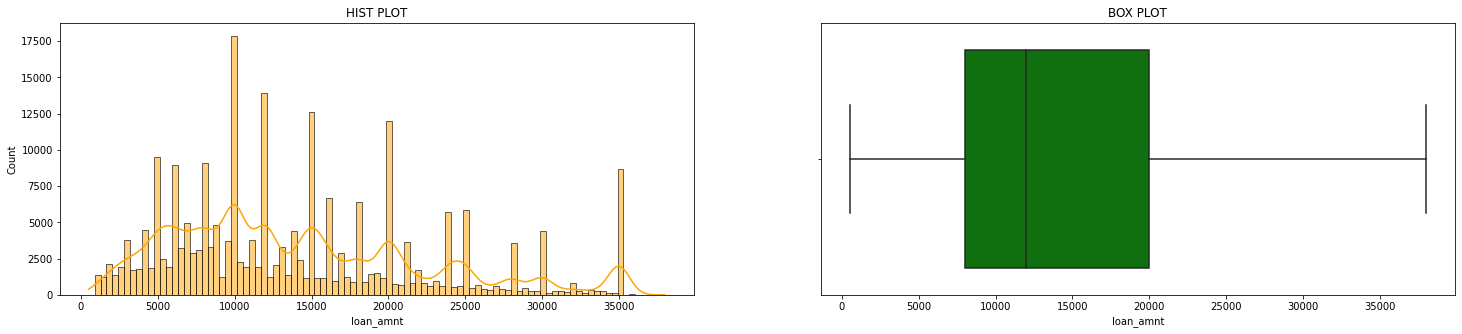

=======int_rate===========
Describe Method
count    237618.000000
mean         13.546928
std           4.318039
min           5.320000
25%          10.490000
50%          13.330000
75%          16.290000
max          25.570000
Name: int_rate, dtype: float64



Value count Method
10.99    7410
12.99    5827
15.61    5637
11.99    5048
8.90     4759
12.12    4477
7.90     4330
13.33    4261
16.29    4015
13.11    3972
Name: int_rate, dtype: int64


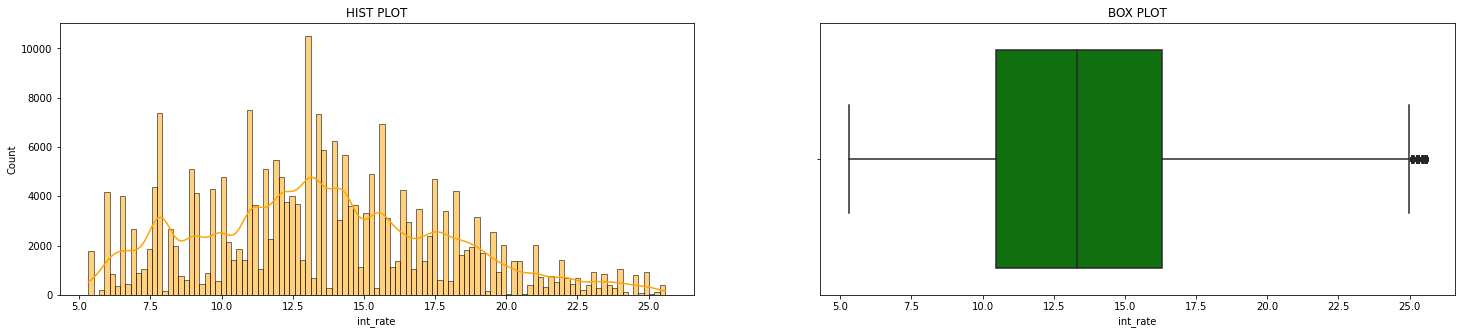

=======installment===========
Describe Method
count    237618.000000
mean        409.369698
std         216.058682
min          16.080000
25%         250.410000
50%         375.490000
75%         538.947500
max        1042.550000
Name: installment, dtype: float64



Value count Method
375.49    6952
327.34     584
332.10     455
491.01     441
336.90     426
392.81     407
332.72     386
337.47     375
317.54     338
654.68     322
Name: installment, dtype: int64


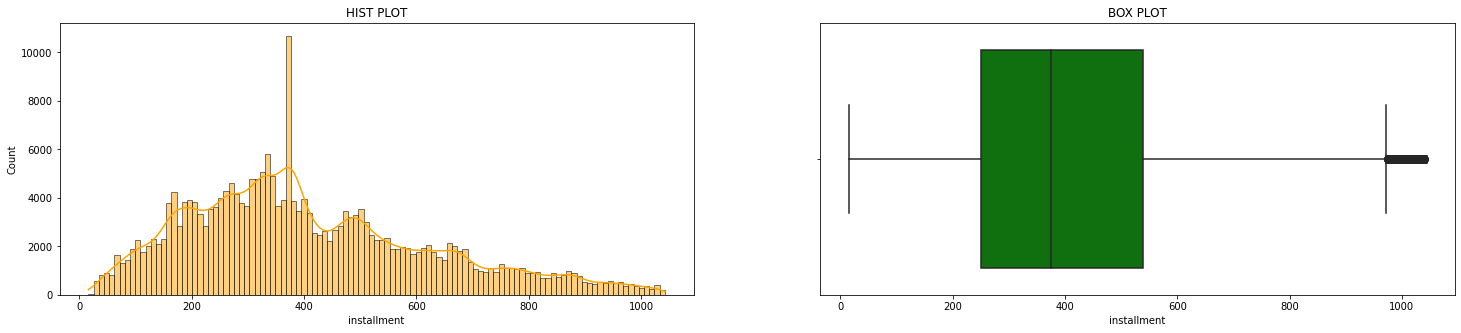

=======annual_inc===========
Describe Method
count    237618.000000
mean      67036.797945
std       29151.122103
min         600.000000
25%       45000.000000
50%       64000.000000
75%       84000.000000
max      157500.000000
Name: annual_inc, dtype: float64



Value count Method
64000.0    10901
60000.0     9323
50000.0     7928
65000.0     6787
40000.0     6371
70000.0     6304
45000.0     6112
75000.0     5944
80000.0     5891
55000.0     5430
Name: annual_inc, dtype: int64


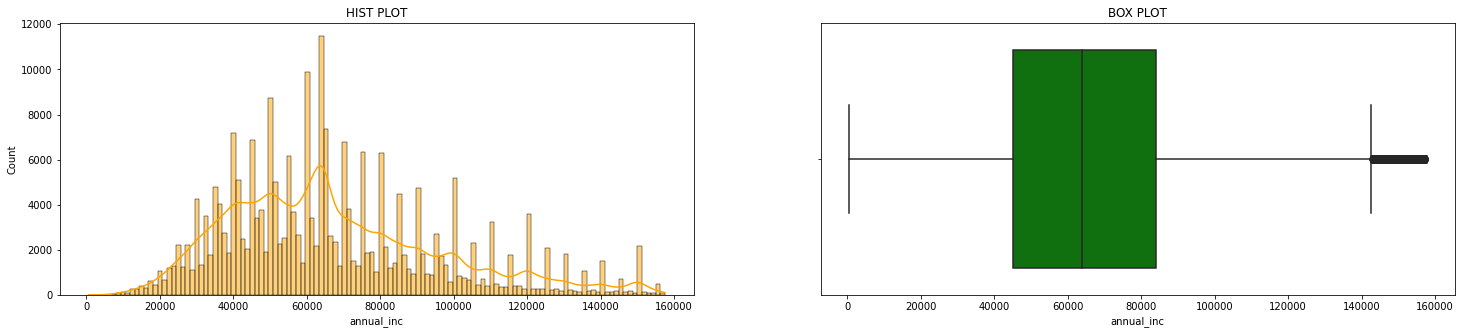

=======open_acc===========
Describe Method
count    237618.000000
mean         10.850782
std           4.332349
min           1.000000
25%           8.000000
50%          10.000000
75%          13.000000
max          23.000000
Name: open_acc, dtype: float64



Value count Method
10.0    27384
9.0     22026
8.0     21022
11.0    19466
7.0     18807
12.0    17586
6.0     15532
13.0    15087
14.0    12781
5.0     11060
Name: open_acc, dtype: int64


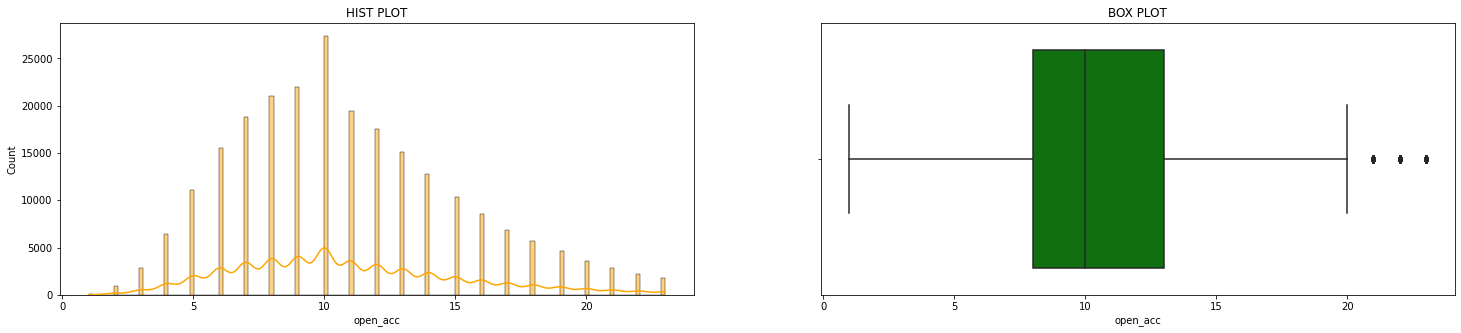

=======total_acc===========
Describe Method
count    237618.000000
mean         24.592657
std          10.554076
min           2.000000
25%          17.000000
50%          24.000000
75%          31.000000
max          54.000000
Name: total_acc, dtype: float64



Value count Method
24.0    13353
22.0     8615
21.0     8609
20.0     8492
19.0     8312
23.0     8295
18.0     8287
17.0     8094
25.0     8014
26.0     7716
Name: total_acc, dtype: int64


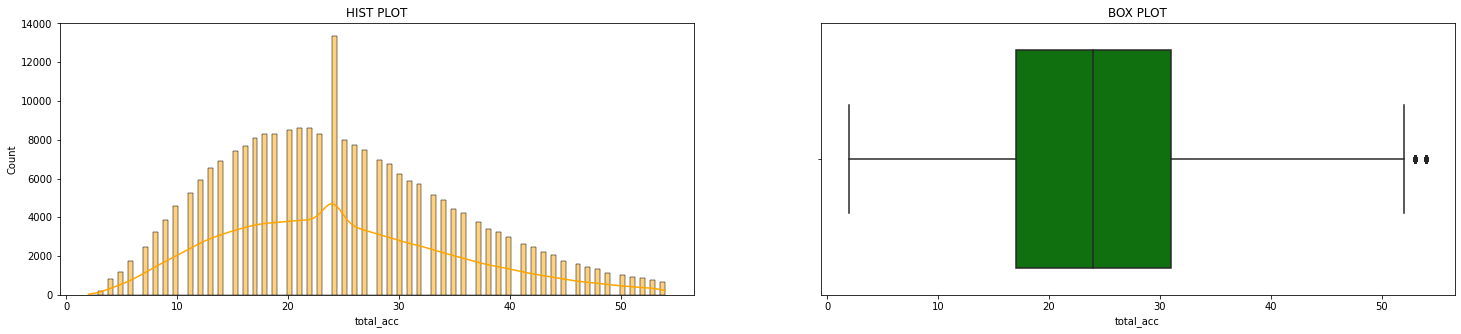

=======revol_bal===========
Describe Method
count    237618.000000
mean      12620.903223
std        8765.016082
min           0.000000
25%        6035.000000
50%       11169.000000
75%       17218.000000
max       40012.000000
Name: revol_bal, dtype: float64



Value count Method
11169.0    12778
0.0         1274
4904.0        28
5655.0        27
7866.0        26
5671.0        25
5514.0        25
5235.0        24
9508.0        24
4808.0        24
Name: revol_bal, dtype: int64


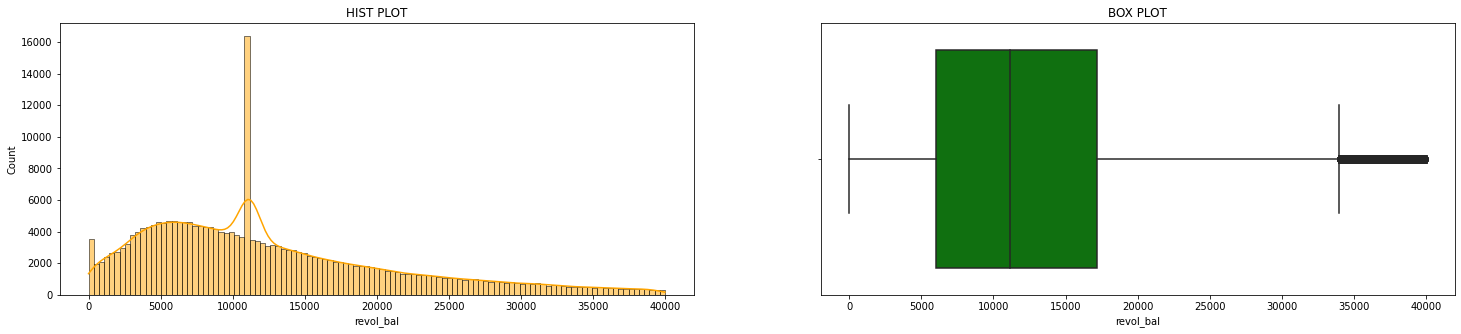

=======revol_util===========
Describe Method
count    237618.000000
mean         53.833246
std          24.374234
min           0.000000
25%          35.900000
50%          54.800000
75%          72.900000
max         128.100000
Name: revol_util, dtype: float64



Value count Method
0.0     1311
54.8     519
61.0     466
53.0     444
57.0     441
60.0     439
54.0     439
65.0     432
55.0     427
58.0     426
Name: revol_util, dtype: int64


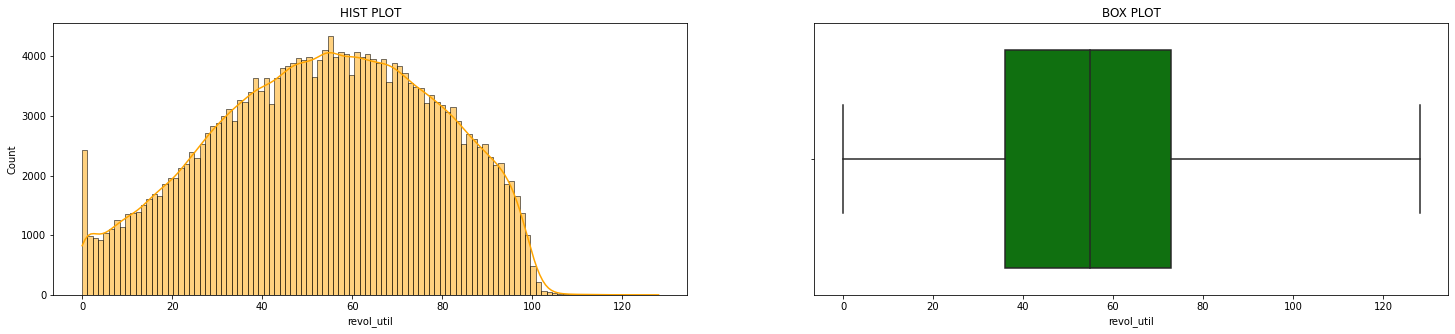

=======dti===========
Describe Method
count    237618.000000
mean         17.324534
std           8.089873
min           0.000000
25%          11.280000
50%          16.910000
75%          22.940000
max          40.450000
Name: dti, dtype: float64



Value count Method
16.91    279
14.40    211
19.20    188
20.40    184
18.00    183
16.80    181
13.20    176
0.00     175
12.00    168
15.60    168
Name: dti, dtype: int64


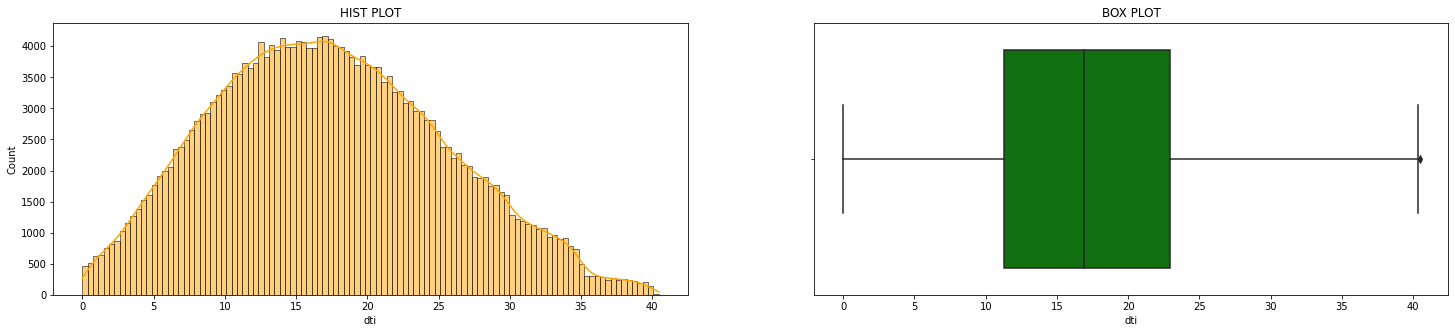

In [ ]:
# Univariate after outlier treatment
for i in num_col_out:
  print(f"======={ i }===========")
  univariateNumerical(X_train, i)

In [ ]:
# Standaridisation

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_columns=X_train.columns
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns = X_train_columns)
X_val = pd.DataFrame(X_val, columns = X_train_columns)
X_test = pd.DataFrame(X_test, columns = X_train_columns)


In [ ]:
y.value_counts()

1    318357
0     77673
Name: loan_status, dtype: int64

In [ ]:
# As the data is imbalance we can apply class weights to handle the imbalanced data
ratio = 318357 / 77673
print(ratio)

4.098682940017767


**<font color='33A2FF'><b> MODEL 1 using Logistic regression with all features<b>**

In [ ]:
# Hyper-pram tuning
from sklearn.linear_model import LogisticRegression
train_scores = []
val_scores = []
for la in np.arange(0.01, 100,  5): # range of values of Lambda
  model = LogisticRegression(C=1/la, class_weight = '{0:1, 1:4}') # C = 1, lambda = 1 , class_weights to handle imbalance data
  model.fit(X_train, y_train)
  train_score = model.score(X_train, y_train)
  val_score = model.score(X_val, y_val)
  train_scores.append(train_score)
  val_scores.append(val_score)

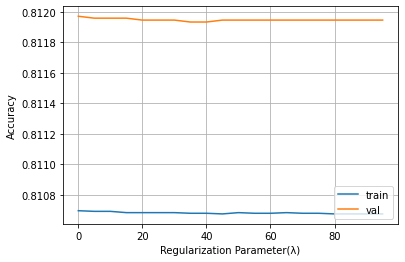

In [ ]:
plt.figure()
plt.plot(list(np.arange(0.01, 100, 5)), train_scores, label="train")
plt.plot(list(np.arange(0.01, 100, 5)), val_scores, label="val")
plt.legend(loc='lower right')

plt.xlabel("Regularization Parameter(λ)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [ ]:
np.argmax(val_scores)

0

In [ ]:
val_scores[0]

0.8119713153043961

In [ ]:
l_best = 0.01

In [ ]:
from sklearn.pipeline import make_pipeline
scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/l_best))
scaled_lr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=100.0))])

In [ ]:
test_sc = scaled_lr.score(X_test, y_test)
y_pred = scaled_lr.predict(X_test)
y_prob = scaled_lr.predict_proba(X_test)

In [ ]:
# Score using best lambda value
print("test score : ", test_sc)

test score :  0.8232457137085575


In [ ]:
# Coefficients
coef = pd.DataFrame()
coef['features'] = X_train.columns
coef['coef'] = [scaled_lr.named_steps['logisticregression'].coef_[0][i] for i in range(X_train.shape[1])]


In [ ]:
coef.sort_values('coef', ascending = False)

,features,coef
6,emp_title,0.677944
12,title,0.343026
1,term,0.186241
9,annual_inc,0.130425
24,issue_year,0.127853
8,home_ownership,0.117001
17,total_acc,0.069720
21,mort_acc_flag,0.069681
10,verification_status,0.047782
15,revol_bal,0.039632


In [ ]:
scaled_lr.named_steps['logisticregression'].intercept_

array([1.72936137])

Accuracy : 82.32457137085575%

recall_score : 96.90113056277599%

precision_score : 83.73430396189652%

f1_score : 89.83784097672866%

AUC score : 78.04075923665435%

confusion_matrix :
[[ 3323 12021]
 [ 1979 61883]]



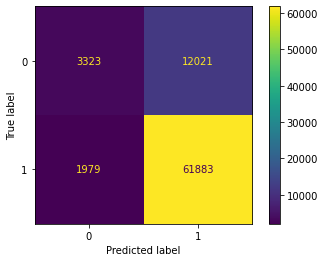

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay

print(f"Accuracy : {accuracy_score(y_test, y_pred)*100}%")
print()
print(f"recall_score : {recall_score(y_test, y_pred)*100}%")
print()
print(f"precision_score : {precision_score(y_test, y_pred)*100}%")
print()
print(f"f1_score : {f1_score(y_test, y_pred)*100}%")
print()
print(f"AUC score : {roc_auc_score( y_test, y_prob[:, 1])*100}%")
print()
print(f"confusion_matrix :")
cm  = confusion_matrix(y_test, y_pred)
print(cm)
print()
ConfusionMatrixDisplay(cm).plot()

In [ ]:
# Let's evaluate the other metrics as well
confusion = confusion_matrix(y_test, y_pred)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Calculate the sensitivity

TP/(TP+FN)

0.9690113056277598

In [ ]:
# Calculate the specificity

TN/(TN+FP)

0.2165667361835245

In [ ]:
from sklearn.metrics import classification_report

print(f"{classification_report(y_test, y_pred)}")

              precision    recall  f1-score   support

           0       0.63      0.22      0.32     15344
           1       0.84      0.97      0.90     63862

    accuracy                           0.82     79206
   macro avg       0.73      0.59      0.61     79206
weighted avg       0.80      0.82      0.79     79206



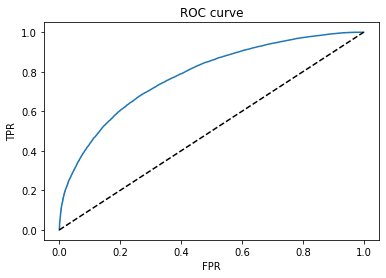


auc_score for ROC curve  0.7804075923665436


In [ ]:
# ROC AUC CURVE

from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt
fpr, tpr, thr = roc_curve(y_test, y_prob[:, 1])
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], 'k--')
auc_score = roc_auc_score( y_test, y_prob[:, 1] )
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()
print()
print("auc_score for ROC curve ", auc_score )

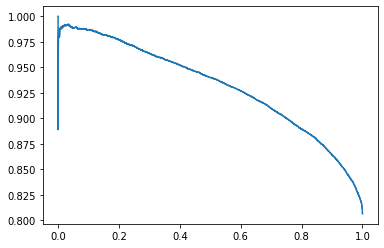


auc of PR curve  0.9319275805933426


In [ ]:
# Checking for precision_recall_curve metric

from sklearn.metrics import precision_recall_curve, auc
pr, re, thresholds = precision_recall_curve(y_test, y_prob[:, 1])
plt.plot(re, pr)
plt.show()

area = auc(re, pr)
print()
print("auc of PR curve ", area )

<font color='#0dab7f'><b>Observation for Model 1</b>: 

<font color='#0dab7f'> 1) As the data is imbalanced, hence we have created the model based using the class weight parameter and got the below metrics.

<font color='#0dab7f'> Accuracy : 82.32 %

<font color='#0dab7f'> recall_score : 96.90 %

<font color='#0dab7f'> precision_score : 83.73 %

<font color='#0dab7f'> f1_score for fully paid : 89.83 % and charge off is : 32 %

<font color='#0dab7f'> auc_score for ROC curve  : 78.04 %

<font color='#0dab7f'> Sensitivity : 96.90 %

<font color='#0dab7f'> Specificity: 21.65 %

<font color='#0dab7f'> auc of PR curve : 93.19 %

<font color='#0dab7f'> 2) F1 score for fully paid customers is 89.93% and we can extend the credit line to this customers where chance of fully repaying the loan is high and it is important as we cannot loose an opportunity and can earn interest from it. 

<font color='#0dab7f'> 3) F1 score for charge off customers is 32%, We have to carefully analyse that we can extend the credit line to this customers because chances of defaulting is high for this customers. In this case we need to take care of Non performing assets which is the real problem, we need to play safe and should not disburse loans to this customers.

<font color='#0dab7f'> 4) Area under PR curve is 93 % which is very good 

**<font color='33A2FF'><b> MODEL 2 using Logistic regression after removing correlated features<b>**

In [ ]:
# Multicollinearity check by VIF score (variables are dropped one-by-one till none has VIF>5)

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
x_t = X_train
vif['features'] = x_t.columns
vif['VIF'] = [variance_inflation_factor(x_t.values, i) for i in range(x_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                     features    VIF
5                   sub_grade  31.51
4                       grade  22.63
2                    int_rate   8.85
0                   loan_amnt   4.95
3                 installment   4.07
17                  total_acc   1.81
14                   open_acc   1.79
15                  revol_bal   1.65
1                        term   1.61
9                  annual_inc   1.52
16                 revol_util   1.47
21              mort_acc_flag   1.47
20               pub_rec_flag   1.41
22  pub_rec_bankruptcies_flag   1.40
8              home_ownership   1.35
13                        dti   1.34
12                      title   1.23
24                 issue_year   1.21
10        verification_status   1.16
11                    purpose   1.15
7                  emp_length   1.07
6                   emp_title   1.05
23                issue_month   1.01
18           application_type   1.00
19                    address   1.00


In [ ]:
# dropping the features having high correlation
X_train.drop(['sub_grade','grade', 'int_rate' ], axis = 1, inplace = True)
X_val.drop(['sub_grade','grade', 'int_rate' ], axis = 1, inplace = True)
X_test.drop(['sub_grade','grade', 'int_rate' ], axis = 1, inplace = True)

In [ ]:
# Hyper-pram tuning
from sklearn.linear_model import LogisticRegression
train_scores = []
val_scores = []
for la in np.arange(0.01, 100,  5): # range of values of Lambda
  model = LogisticRegression(C=1/la, class_weight = {0:1, 1:4}) # C = 1, lambda = 1 , class_weights to handle imbalance data
  model.fit(X_train, y_train)
  train_score = model.score(X_train, y_train)
  val_score = model.score(X_val, y_val)
  train_scores.append(train_score)
  val_scores.append(val_score)

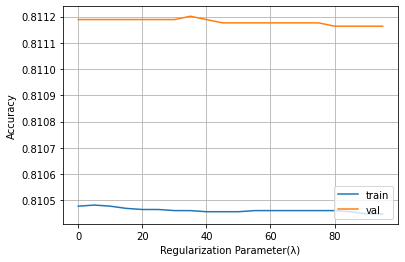

In [ ]:
plt.figure()
plt.plot(list(np.arange(0.01, 100, 5)), train_scores, label="train")
plt.plot(list(np.arange(0.01, 100, 5)), val_scores, label="val")
plt.legend(loc='lower right')

plt.xlabel("Regularization Parameter(λ)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [ ]:
np.argmax(val_scores)

7

In [ ]:
val_scores[7]

0.811201171628412

In [ ]:
l_best = 0.01 * 7 * 5

In [ ]:
from sklearn.pipeline import make_pipeline
scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/l_best))
scaled_lr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=2.8571428571428568))])

In [ ]:
test_sc = scaled_lr.score(X_test, y_test)
y_pred = scaled_lr.predict(X_test)
y_prob = scaled_lr.predict_proba(X_test)

In [ ]:
# Score using best lambda value
print("test score : ", test_sc)

test score :  0.8207585283943135


In [ ]:
# Coefficients
coef = pd.DataFrame()
coef['features'] = X_train.columns
coef['coef'] = [scaled_lr.named_steps['logisticregression'].coef_[0][i] for i in range(X_train.shape[1])]


In [ ]:
coef.sort_values('coef', ascending = False)

,features,coef
3,emp_title,0.687330
1,term,0.366432
9,title,0.355572
6,annual_inc,0.169967
5,home_ownership,0.140613
21,issue_year,0.119497
12,revol_bal,0.110205
7,verification_status,0.097533
14,total_acc,0.093069
18,mort_acc_flag,0.079411


In [ ]:
scaled_lr.named_steps['logisticregression'].intercept_

array([1.69218435])

Accuracy : 82.07585283943135%

recall_score : 97.46641195076884%

precision_score : 83.18832444569183%

f1_score : 89.76313227818437%

AUC score : 76.61038235583511%

confusion_matrix :
[[ 2765 12579]
 [ 1618 62244]]



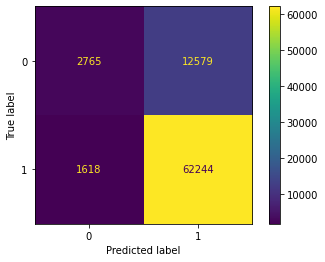

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay

print(f"Accuracy : {accuracy_score(y_test, y_pred)*100}%")
print()
print(f"recall_score : {recall_score(y_test, y_pred)*100}%")
print()
print(f"precision_score : {precision_score(y_test, y_pred)*100}%")
print()
print(f"f1_score : {f1_score(y_test, y_pred)*100}%")
print()
print(f"AUC score : {roc_auc_score( y_test, y_prob[:, 1])*100}%")
print()
print(f"confusion_matrix :")
cm  = confusion_matrix(y_test, y_pred)
print(cm)
print()
ConfusionMatrixDisplay(cm).plot()

In [ ]:
# Let's evaluate the other metrics as well
confusion = confusion_matrix(y_test, y_pred)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Calculate the sensitivity

TP/(TP+FN)

0.9746641195076885

In [ ]:
# Calculate the specificity

TN/(TN+FP)

0.1802007299270073

In [ ]:
from sklearn.metrics import classification_report

print(f"{classification_report(y_test, y_pred)}")

              precision    recall  f1-score   support

           0       0.63      0.18      0.28     15344
           1       0.83      0.97      0.90     63862

    accuracy                           0.82     79206
   macro avg       0.73      0.58      0.59     79206
weighted avg       0.79      0.82      0.78     79206



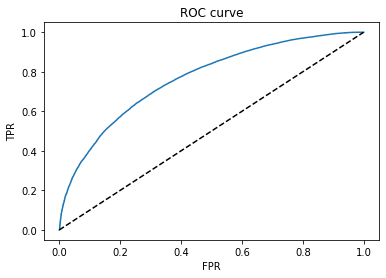


auc_score for ROC curve  0.7661038235583512


In [ ]:
# ROC AUC CURVE

from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt
fpr, tpr, thr = roc_curve(y_test, y_prob[:, 1])
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], 'k--')
auc_score = roc_auc_score( y_test, y_prob[:, 1] )
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()
print()
print("auc_score for ROC curve ", auc_score )

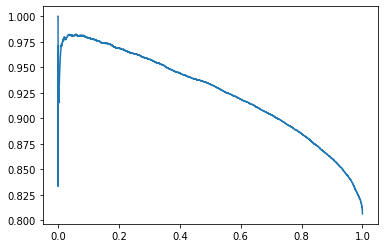


auc of PR curve  0.9249918829743058


In [ ]:
# Checking for precision_recall_curve metric

from sklearn.metrics import precision_recall_curve, auc
pr, re, thresholds = precision_recall_curve(y_test, y_prob[:, 1])
plt.plot(re, pr)
plt.show()

area = auc(re, pr)
print()
print("auc of PR curve ", area )

<font color='#0dab7f'><b>Observation for Model 2</b>: 

<font color='#0dab7f'> 1) As the data is imbalanced, hence we have created the model based using the class weight parameter and got the below metrics.

<font color='#0dab7f'> Accuracy : 82.07 %

<font color='#0dab7f'> Recall_score : 97.46 %.  Recall score increases as number FN decreases.  False negative is Fully paid predicted as charge off. 


<font color='#0dab7f'> Precision_score : 83.18 %. Precision score increases as number of FP decreases. False positive is charge off predicted as fully paid.
In order to have less false positive we need to increase our precision score 


<font color='#0dab7f'> F1_score for fully paid : 89.76 % and charge off is : 28 %

<font color='#0dab7f'> Auc_score for ROC curve  : 76.61 %

<font color='#0dab7f'> Sensitivity : 97.46 %

<font color='#0dab7f'> Specificity: 18.02 %

<font color='#0dab7f'> Auc of PR curve : 92.49 %

<font color='#0dab7f'> 2) F1 score for fully paid customers is 89.76% and we can extend the credit line to this customers where chance of fully repaying the loan is high and it is important as we cannot loose an opportunity and can earn interest from it. 

<font color='#0dab7f'> 3) F1 score for charge off customers is 28% which is reduced when compared to model1, We have to carefully analyse that we can extend the credit line to this customers because chances of defaulting is high for this customers. In this case we need to take care of Non performing assets which is the real problem, we need to play safe and should not disburse loans to this customers.

<font color='#0dab7f'> 4) Area under PR curve is 92.49 % which is very good and it is not significantly reduced after removing highly correlated features 

<font color='#0dab7f'> 5) Recall score has been increased when compared to previous model 1.

<font color='#0dab7f'><b>Actionable Insights & Recommendations: </b> 

<font color='#0dab7f'> 1. Non performing asset is main problem in banks. We need to think in terms of not loosing money to bad loans. Recall is the parameter which should be more focused. 

<font color='#0dab7f'> Based on the Analysis below items are having high charge off. So we need to focus on this customers not giving loans

*   column purpose having small business, 
*   Column Grade having G, 
*   Lower income group, 
*   customers who are ready for higher interest rate
*   Self employees 


<font color='#0dab7f'> 2. With increase in Annual Income, probability of charge off reduces so Loan can be provided to higher income group

<font color='#0dab7f'> 3. Grade A has highest probability of fully paying the loan. As the grade decreases charge off also increases. So loan should be provided to Higher grades.

<font color='#0dab7f'> 4. In terms of underwriting process we need to make sure income source is verified by Banks to avoid the defaults. Banks should give the loans to customers whose income source is verified.

<font color='#0dab7f'><b> Tradeoff Questions:</b> 

<font color='#0dab7f'><b> 1. How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it. 
</b>

<font color='#0dab7f'> -- We should concentrate on Precision metrics. As the number False positives decreases Precision increases . In this case False positives are "charge off" customers predicted as "Fully Paid". So we will be giving loans to customers who will charge off. We need to increase the precision score. Our model 1 and 2 has precision around 83%. 
We need to concentrate on balancing the data by using class weights, treat outliers and best hyperparameter for tunning.

<font color='#0dab7f'><b> 2. Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone.</b>

<font color='#0dab7f'> -- We should concentrate on Recall metrics. As the number False negative decreases Recall increases. In this case False Negatives are "Fully paid" customers are identified as "Charge off" customers. So we will miss the opportunity giving loan to honesty customer which in turn links to missing the opportunity. We need to increase the Recall score. Our model 1 and 2 has Recall score of 97 % which is very good means chance of missing opportunity is very less. 

<font color='#0dab7f'><b>  Questionnaire </b> 

<font color='#0dab7f'> 1. What percentage of customers have fully paid their Loan Amount? 

--- 80% of customers have fully paid the loan amount

<font color='#0dab7f'> 2. Comment about the correlation between Loan Amount and Installment features. 

--- 'loan_amnt' and 'installment' have high variation inflation factor of 44, hence we can drop any one variable for model building.

--- loan_amnt and installment are highly correlated, Hence loan amount increase installment increases

---When the loan taken is less, Installment is same for customers who have charge off and fully paid.

---Whereas when loan amount increases, the installments owed by the Charge off customer decreases as compared to the installments by the Fully paid customers.


<font color='#0dab7f'> 3. The majority of people have home ownership as 

---Mortgaged their home

<font color='#0dab7f'> 4. People with grades ‘A’ are more likely to fully pay their loan. (T/F) 

---True . As the grade increases laons are fully paid.

<font color='#0dab7f'> 5. Name the top 2 afforded job titles 

--- Teacher and Manager


<font color='#0dab7f'> 6. Thinking from a bank's perspective, which metric should our primary focus be on..

--- Not loosing money to bad loans, Recall should be focussed and our model 1 and 2 has recall score 97 % which is very near to 1. 

--- Not loosing Opportunities, Precision should be focussed in this case and our model 1 and 2 has precision score of 83 % which is also good.

--- As the data is not balanced we need to consider F1 Score which is harmonic combination of Precision and Recall 

--- Non performing asset is main problem with banks. But we need to make sure not loosing money for bad loans and we need to have high recall score.


<font color='#0dab7f'> 7. How does the gap in precision and recall affect the bank?  

--- If the gap between precision and recall more then there are high chances giving bad loans and increase in NPA. 
Our model 1 and 2 has precison score of 83 % and Recall score of 97 %  and difference is only 14 %. Recall is more which means chance of missing opportunity ( Fully paid customers) is very less. Precsion score is little less compared to Recall still it is around 83 % so chance of giving bad loan is only little. 

<font color='#0dab7f'> 8. Which were the features that heavily affected the outcome?

--- As per my analysis, Employee experience ( emp_length ), Loan purpose ( purpose), Annual income (annual_inc ), grade, int_rate, application_type are the features which has high impact to outcome.


<font color='#0dab7f'> 9. Will the results be affected by geographical location? (Yes/No)

Yes, there are few loactions which has high charge off customers. Hence it has impact to target variable.